# Análisis Avanzado y Visualización de Datos de Viviendas en Andalucía: Enfoque Provincial

Este cuaderno se enfoca en el análisis exploratorio avanzado y la visualización de datos del conjunto de viviendas en Andalucía, con un énfasis particular en el análisis comparativo entre sus 8 provincias: Almería, Cádiz, Córdoba, Granada, Huelva, Jaén, Málaga y Sevilla. Utilizaremos diversas técnicas para comprender mejor las distribuciones, relaciones entre variables, patrones geoespaciales y segmentación de mercado, tanto a nivel general como provincial. Este trabajo forma parte de la preparación para un Trabajo de Fin de Grado (TFG) sobre predicción de precios de viviendas.

**Objetivos Principales:**
1.  Analizar distribuciones y outliers de variables numéricas clave.
2.  Explorar variables categóricas y su impacto en el precio.
3.  Investigar correlaciones y relaciones multivariadas.
4.  Realizar análisis geoespacial general de precios y características.
5.  **Ingeniería de la característica 'provincia' y análisis de distribución de propiedades.**
6.  **Realizar análisis descriptivo de variables clave por provincia.**
7.  **Comparar precios (`precio` y `precio_m2`) entre las 8 provincias.**
8.  **Analizar la distribución de tipos de propiedad por provincia y su relación con el precio.**
9.  **Visualizar densidades de propiedades y precios medios con un enfoque provincial.**

**Dataset:**
Utilizaremos el dataset `andalucia_clean_20250516.csv`, que ha sido previamente limpiado y preprocesado.

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import os


In [3]:
# Configuración de visualizaciones
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formato para floats

# Definir rutas de archivos
data_dir = '../data/clean' # Ajusta esta ruta si es necesario
file_name = 'andalucia_clean_20250516.csv'
file_path = os.path.join(data_dir, file_name)

# Cargar el dataset
try:
    df = pd.read_csv(file_path)
    print(f"Dataset cargado exitosamente desde: {file_path}")
    print(f"Dimensiones del dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo en {file_path}")
    print(f"Asegúrate de que la ruta '{data_dir}' y el archivo '{file_name}' son correctos.")
    df = pd.DataFrame() # DataFrame vacío para evitar errores

# Mostrar primeras filas e información básica
if not df.empty:
    print("\nPrimeras 5 filas del dataset:")
    display(df.head())
    print("\nInformación general del DataFrame:")
    df.info()
    print("\nEstadísticas descriptivas básicas:")
    display(df.describe())
else:
    print("El DataFrame está vacío.")

Dataset cargado exitosamente desde: ../data/clean\andalucia_clean_20250516.csv
Dimensiones del dataset: (24107, 10)

Primeras 5 filas del dataset:


,precio,tipo_propiedad,superficie,habitaciones,baños,latitud,longitud,ubicacion,precio_m2,densidad_habitaciones
0,5800.00,casa_rural,168.00,4,1,37.12,-2.54,el almendral s/n,34.52,0.02
1,9000.00,chalet,60.00,2,1,37.35,-2.30,calle San Antonio,150.00,0.03
2,9500.00,chalet,115.00,3,1,37.35,-2.30,Olula del Río,82.61,0.03
3,9900.00,chalet,81.00,3,2,37.04,-2.74,"calle Lucero, 3",122.22,0.04
4,10000.00,piso,45.00,2,1,36.84,-2.48,calle Juan Goytisolo,222.22,0.04



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24107 entries, 0 to 24106
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   precio                 24107 non-null  float64
 1   tipo_propiedad         24107 non-null  object 
 2   superficie             24107 non-null  float64
 3   habitaciones           24107 non-null  int64  
 4   baños                  24107 non-null  int64  
 5   latitud                24107 non-null  float64
 6   longitud               24107 non-null  float64
 7   ubicacion              24107 non-null  object 
 8   precio_m2              24107 non-null  float64
 9   densidad_habitaciones  24107 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.8+ MB

Estadísticas descriptivas básicas:


,precio,superficie,habitaciones,baños,latitud,longitud,precio_m2,densidad_habitaciones
count,24107.00,24107.00,24107.00,24107.00,24107.00,24107.00,24107.00,24107.00
mean,672867.85,251.55,3.75,2.37,37.14,-5.01,1792.81,0.02
std,1593525.62,355.43,2.25,1.94,0.50,1.32,1826.00,0.01
min,3525.00,9.00,0.00,0.00,36.01,-7.49,11.09,0.00
25%,62100.00,87.00,3.00,1.00,36.76,-6.00,597.48,0.01
50%,100000.00,136.00,3.00,2.00,37.20,-5.02,1091.08,0.02
75%,550000.00,272.00,5.00,3.00,37.40,-4.14,2324.58,0.03
max,29000000.00,10000.00,70.00,35.00,38.60,-1.74,10000.00,0.15


## 1. Análisis de Distribuciones y Outliers en Variables Numéricas Clave

Analizaremos las distribuciones de las variables numéricas más importantes: `precio`, `superficie`, `precio_m2`, `habitaciones` y `baños`. Utilizaremos histogramas y boxplots para visualizar su forma, identificar outliers y calcular coeficientes de asimetría y curtosis. También exploraremos el efecto de transformaciones logarítmicas en variables con alta asimetría.

Análisis de Distribuciones de Variables Numéricas Clave

--- Análisis de 'precio' ---
Media: 672867.85
Mediana: 100000.00
Desviación Estándar: 1593525.62
Asimetría (Skewness): 4.67
Curtosis (Kurtosis): 30.05


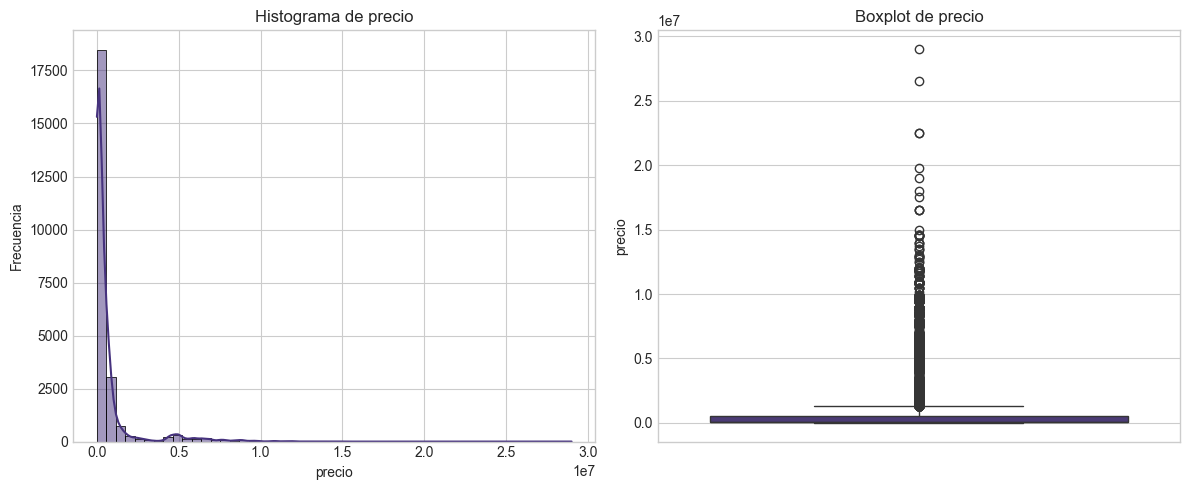


Aplicando transformación logarítmica a 'precio'
Asimetría de 'precio_log': 0.73
Curtosis de 'precio_log': -0.16


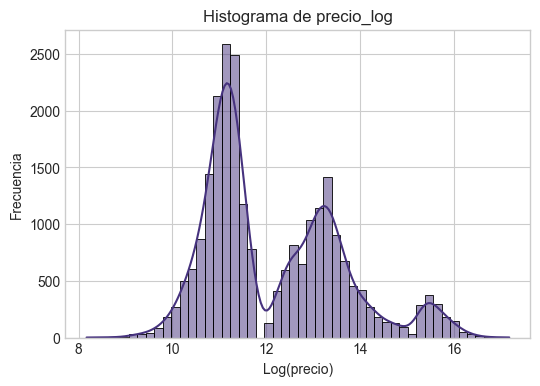


--- Análisis de 'superficie' ---
Media: 251.55
Mediana: 136.00
Desviación Estándar: 355.43
Asimetría (Skewness): 7.61
Curtosis (Kurtosis): 121.38


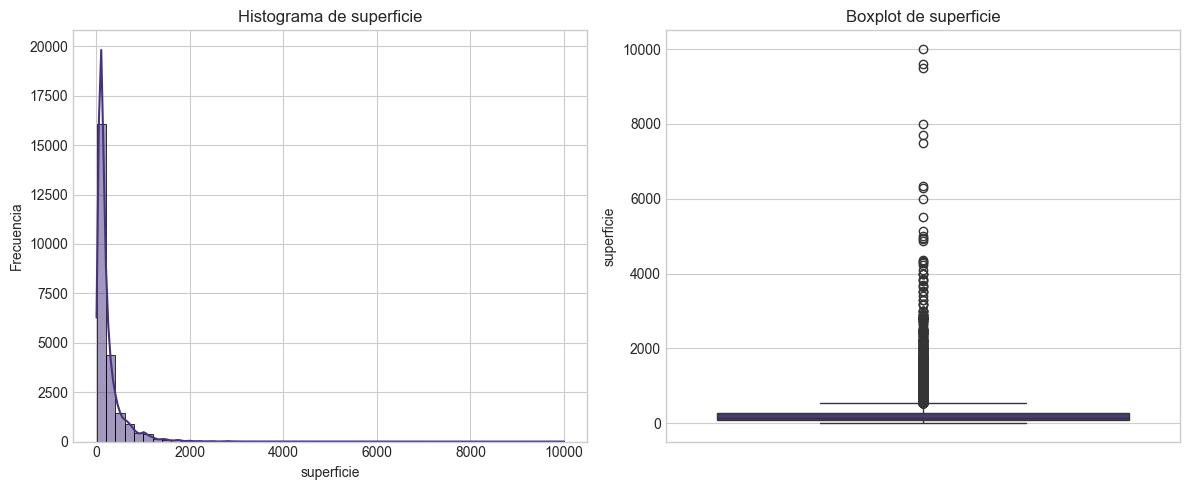


--- Análisis de 'precio_m2' ---
Media: 1792.81
Mediana: 1091.08
Desviación Estándar: 1826.00
Asimetría (Skewness): 2.04
Curtosis (Kurtosis): 4.41


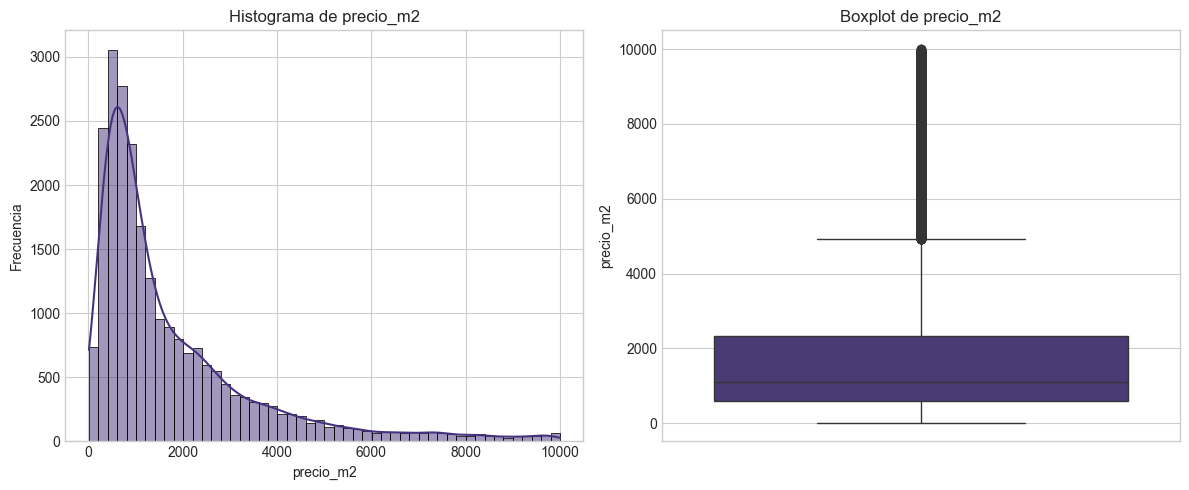


Aplicando transformación logarítmica a 'precio_m2'
Asimetría de 'precio_m2_log': -0.02
Curtosis de 'precio_m2_log': -0.23


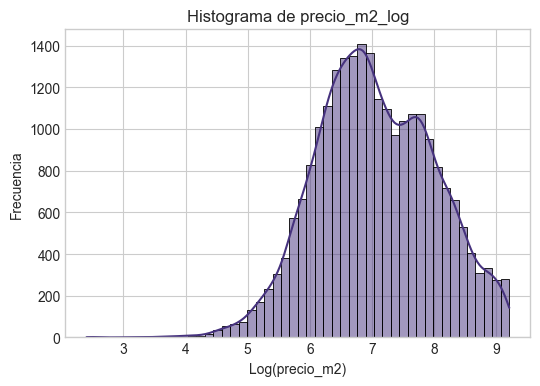


--- Análisis de 'habitaciones' ---
Media: 3.75
Mediana: 3.00
Desviación Estándar: 2.25
Asimetría (Skewness): 4.08
Curtosis (Kurtosis): 54.78


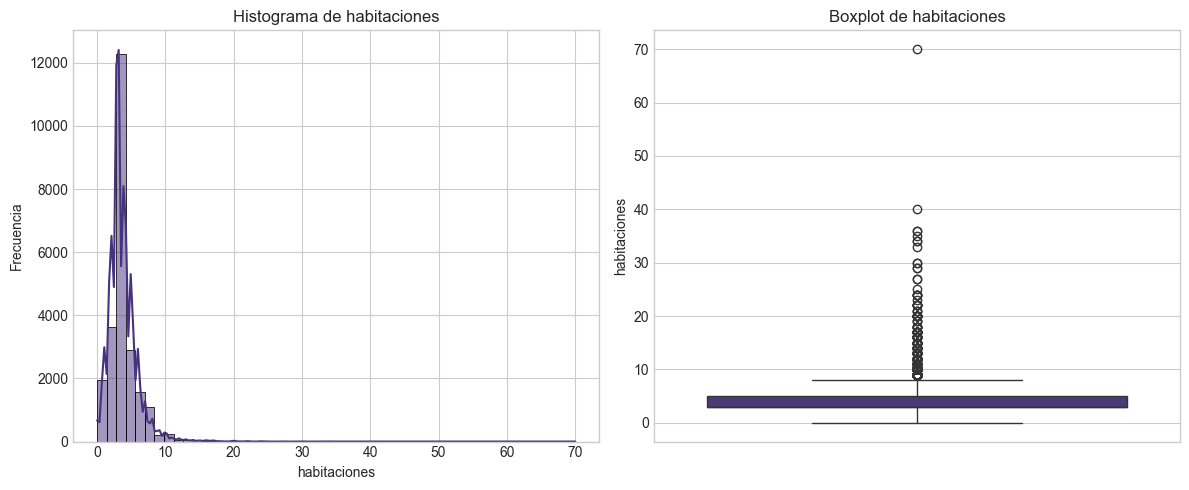


--- Análisis de 'baños' ---
Media: 2.37
Mediana: 2.00
Desviación Estándar: 1.94
Asimetría (Skewness): 2.94
Curtosis (Kurtosis): 20.06


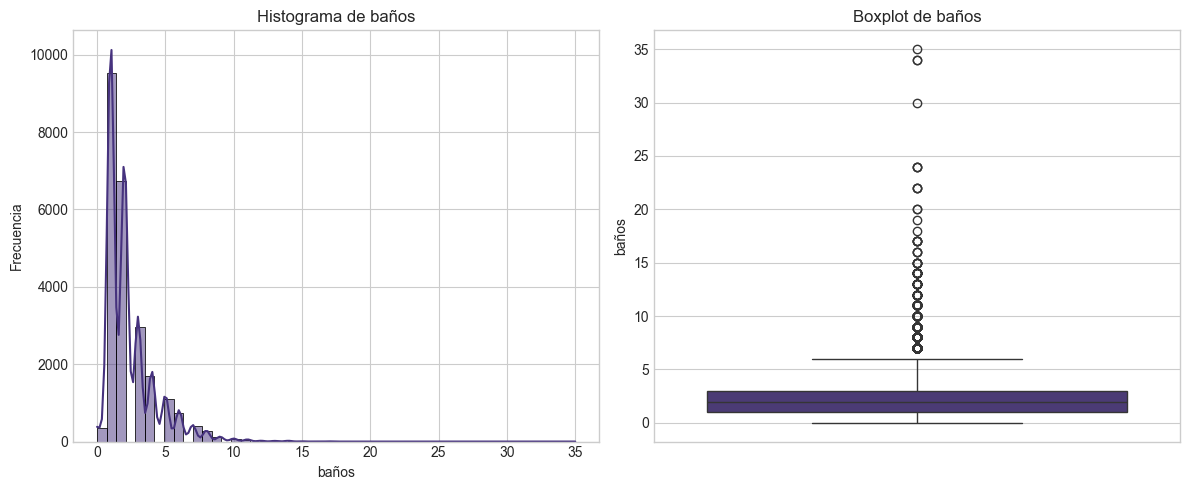

In [4]:
if not df.empty:
    numerical_cols = ['precio', 'superficie', 'precio_m2', 'habitaciones', 'baños']
    
    # Eliminar filas con NaN en estas columnas específicas para el análisis de distribución
    df_analysis = df.dropna(subset=numerical_cols).copy() # Usar .copy() para evitar SettingWithCopyWarning

    print("Análisis de Distribuciones de Variables Numéricas Clave")
    print("=======================================================")

    for col in numerical_cols:
        if col in df_analysis.columns:
            print(f"\n--- Análisis de '{col}' ---")
            
            # Estadísticas
            print(f"Media: {df_analysis[col].mean():.2f}")
            print(f"Mediana: {df_analysis[col].median():.2f}")
            print(f"Desviación Estándar: {df_analysis[col].std():.2f}")
            print(f"Asimetría (Skewness): {skew(df_analysis[col]):.2f}")
            print(f"Curtosis (Kurtosis): {kurtosis(df_analysis[col]):.2f}")
            
            # Histogramas
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(df_analysis[col], kde=True, bins=50)
            plt.title(f'Histograma de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            
            # Boxplots
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_analysis[col])
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)
            
            plt.tight_layout()
            plt.show()

            # Considerar transformación logarítmica para precio y precio_m2 si son muy asimétricas
            if col in ['precio', 'precio_m2'] and skew(df_analysis[col]) > 1:
                # Asegurarse de que no haya valores <= 0 antes de aplicar log
                if (df_analysis[col] > 0).all():
                    df_analysis[f'{col}_log'] = np.log(df_analysis[col])
                    print(f"\nAplicando transformación logarítmica a '{col}'")
                    print(f"Asimetría de '{col}_log': {skew(df_analysis[f'{col}_log']):.2f}")
                    print(f"Curtosis de '{col}_log': {kurtosis(df_analysis[f'{col}_log']):.2f}")
                    
                    plt.figure(figsize=(6, 4))
                    sns.histplot(df_analysis[f'{col}_log'], kde=True, bins=50)
                    plt.title(f'Histograma de {col}_log')
                    plt.xlabel(f'Log({col})')
                    plt.ylabel('Frecuencia')
                    plt.show()
                else:
                    print(f"No se puede aplicar transformación logarítmica a '{col}' debido a valores no positivos.")
        else:
            print(f"La columna '{col}' no existe en el DataFrame.")
else:
    print("El DataFrame está vacío. No se puede realizar el análisis.")

**Discusión de Distribuciones y Outliers:**

*   **Precio:** Generalmente muestra una fuerte asimetría positiva. La transformación logarítmica suele ayudar a normalizar esta distribución.
*   **Superficie:** Similar al precio, tiende a ser asimétrica a la derecha.
*   **Precio_m2:** También puede ser asimétrica. Su transformación logarítmica puede ser útil.
*   **Habitaciones y Baños:** Variables discretas. Sus histogramas muestran la frecuencia de cada número.

## 2. Exploración de Variables Categóricas y su Impacto en el Precio

Analizaremos la variable categórica `tipo_propiedad` y su relación con el `precio` (y `precio_m2`). También exploraremos la variable `ubicacion` para entender su estructura antes del análisis provincial detallado.


Análisis de Variables Categóricas

--- Análisis de 'tipo_propiedad' ---


C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3067218497.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='tipo_propiedad', order=df['tipo_propiedad'].value_counts().index, palette='viridis')


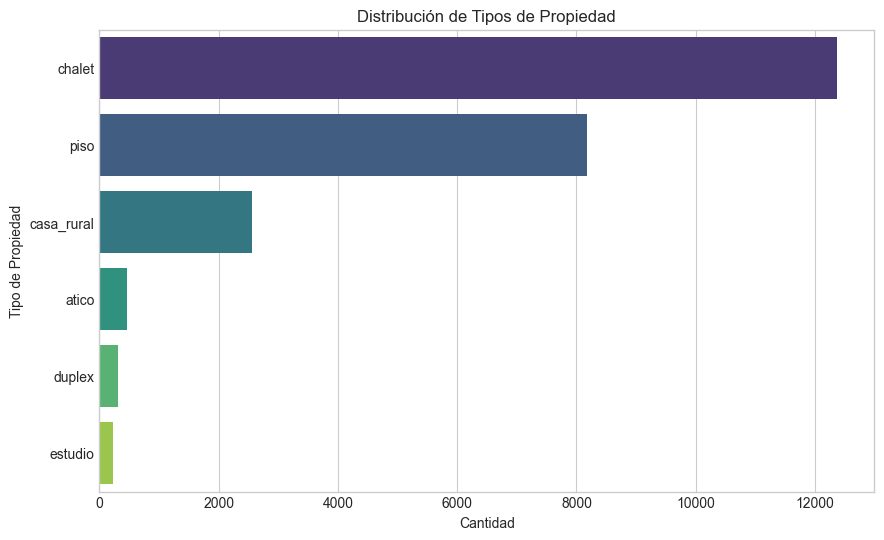


Frecuencia de Tipos de Propiedad (%):
tipo_propiedad
chalet       51.33
piso         33.89
casa_rural   10.62
atico         1.90
duplex        1.32
estudio       0.93
Name: proportion, dtype: float64


C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3067218497.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')


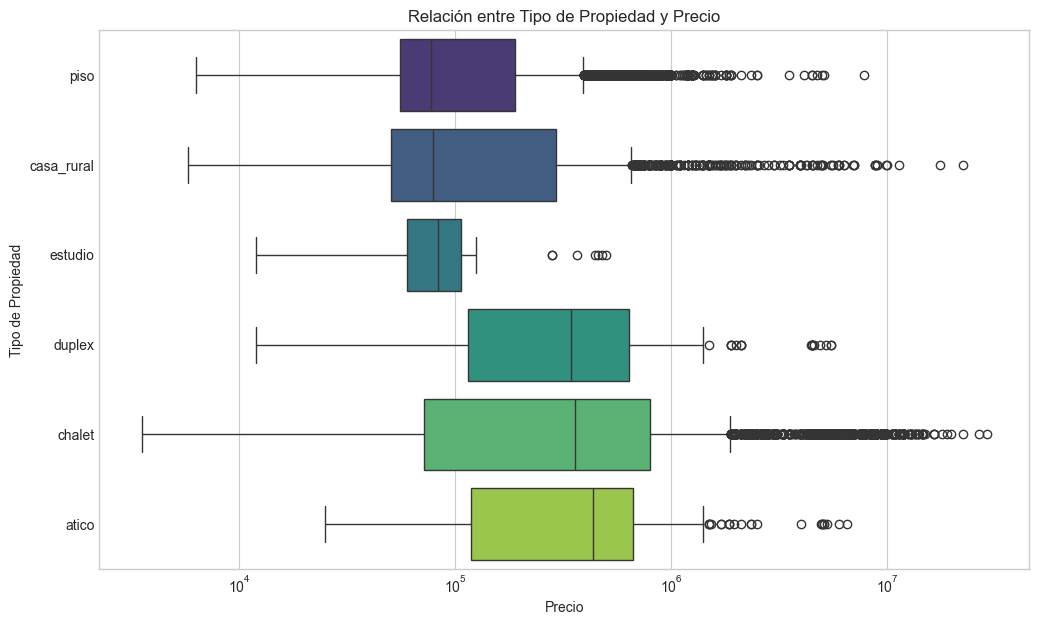

C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3067218497.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')


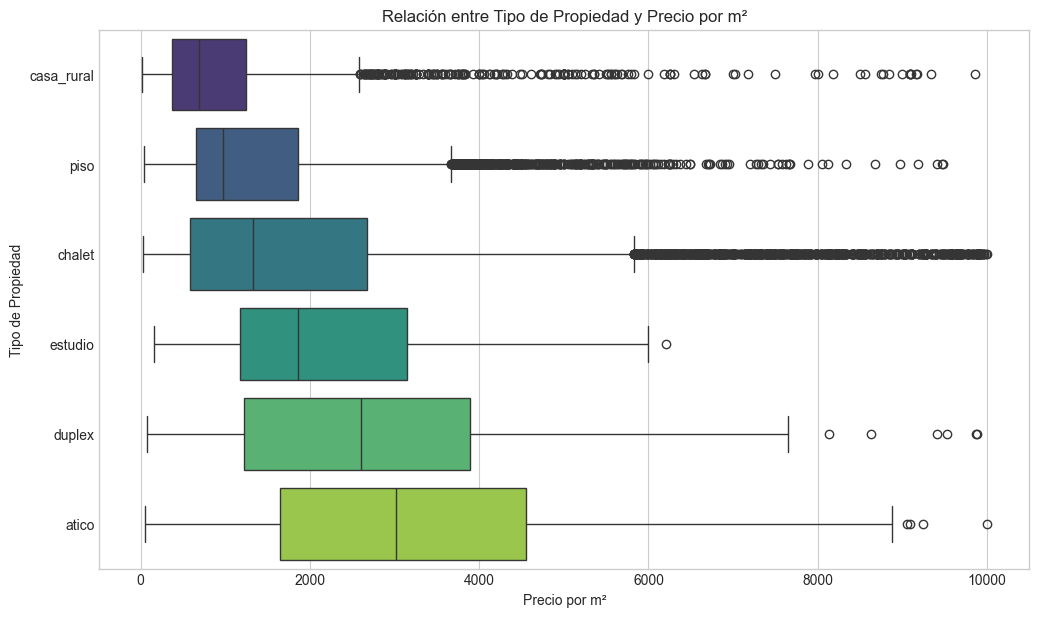


--- Análisis preliminar de 'ubicacion' ---
Número de ubicaciones únicas: 12640

Top 10 ubicaciones más frecuentes:
ubicacion
Barrio Brillante                                 185
Centro                                           147
Barrio Centro                                    138
Barrio Casco Histórico - Corredera - Ribera      110
Lepe                                              91
Barrio Casco Histórico - Ollerías - Marrubial     85
Barrio Zona F                                     81
Ecija                                             69
Barrio Tablero                                    68
Arcos de la Frontera                              67
Name: count, dtype: int64


In [5]:
if not df.empty:
    print("\nAnálisis de Variables Categóricas")
    print("===================================")

    # Análisis de 'tipo_propiedad'
    if 'tipo_propiedad' in df.columns:
        print("\n--- Análisis de 'tipo_propiedad' ---")
        
        # Distribución de tipo_propiedad
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y='tipo_propiedad', order=df['tipo_propiedad'].value_counts().index, palette='viridis')
        plt.title('Distribución de Tipos de Propiedad')
        plt.xlabel('Cantidad')
        plt.ylabel('Tipo de Propiedad')
        plt.show()
        
        print("\nFrecuencia de Tipos de Propiedad (%):")
        print(df['tipo_propiedad'].value_counts(normalize=True) * 100)

        # Relación entre tipo_propiedad y precio
        if 'precio' in df.columns:
            plt.figure(figsize=(12, 7))
            # Ordenar por precio mediano para mejor visualización
            order_tp = df.groupby('tipo_propiedad')['precio'].median().sort_values().index
            sns.boxplot(data=df, x='precio', y='tipo_propiedad', order=order_tp, palette='viridis')
            plt.title('Relación entre Tipo de Propiedad y Precio')
            plt.xlabel('Precio')
            plt.ylabel('Tipo de Propiedad')
            plt.xscale('log') # Usar escala logarítmica para el precio
            plt.show()

        # Relación entre tipo_propiedad y precio_m2
        if 'precio_m2' in df.columns:
            plt.figure(figsize=(12, 7))
            # Ordenar por precio_m2 mediano
            order_tpm2 = df.groupby('tipo_propiedad')['precio_m2'].median().sort_values().index
            sns.boxplot(data=df, x='precio_m2', y='tipo_propiedad', order=order_tpm2, palette='viridis')
            plt.title('Relación entre Tipo de Propiedad y Precio por m²')
            plt.xlabel('Precio por m²')
            plt.ylabel('Tipo de Propiedad')
            # plt.xscale('log') # Opcional para precio_m2
            plt.show()
    else:
        print("La columna 'tipo_propiedad' no existe.")

    # Análisis preliminar de 'ubicacion'
    if 'ubicacion' in df.columns:
        print("\n--- Análisis preliminar de 'ubicacion' ---")
        num_unique_locations = df['ubicacion'].nunique()
        print(f"Número de ubicaciones únicas: {num_unique_locations}")

        if num_unique_locations > 1:
            top_n = 10 
            print(f"\nTop {top_n} ubicaciones más frecuentes:")
            top_locations = df['ubicacion'].value_counts().nlargest(top_n)
            print(top_locations)
            
            # No se graficará aquí, ya que el análisis provincial será más detallado.
            # Se mostrará cómo se deriva 'provincia' de 'ubicacion' más adelante.
        else:
            print("La columna 'ubicacion' tiene un solo valor único o está vacía.")
            
    else:
        print("La columna 'ubicacion' no existe.")
else:
    print("El DataFrame está vacío. No se puede realizar el análisis.")

**Discusión de Variables Categóricas:**

*   **Tipo de Propiedad:** Los diagramas revelan los tipos más comunes y cómo varían los precios entre ellos.
*   **Ubicación:** Esta variable tiene alta cardinalidad. En secciones posteriores, intentaremos extraer la provincia para un análisis más estructurado.

## 3. Análisis de Correlación Multivariada

Calcularemos y visualizaremos la matriz de correlación para todas las variables numéricas para entender las relaciones lineales entre ellas. Usaremos `pairplots` para un subconjunto de variables clave.


Análisis de Correlación Multivariada


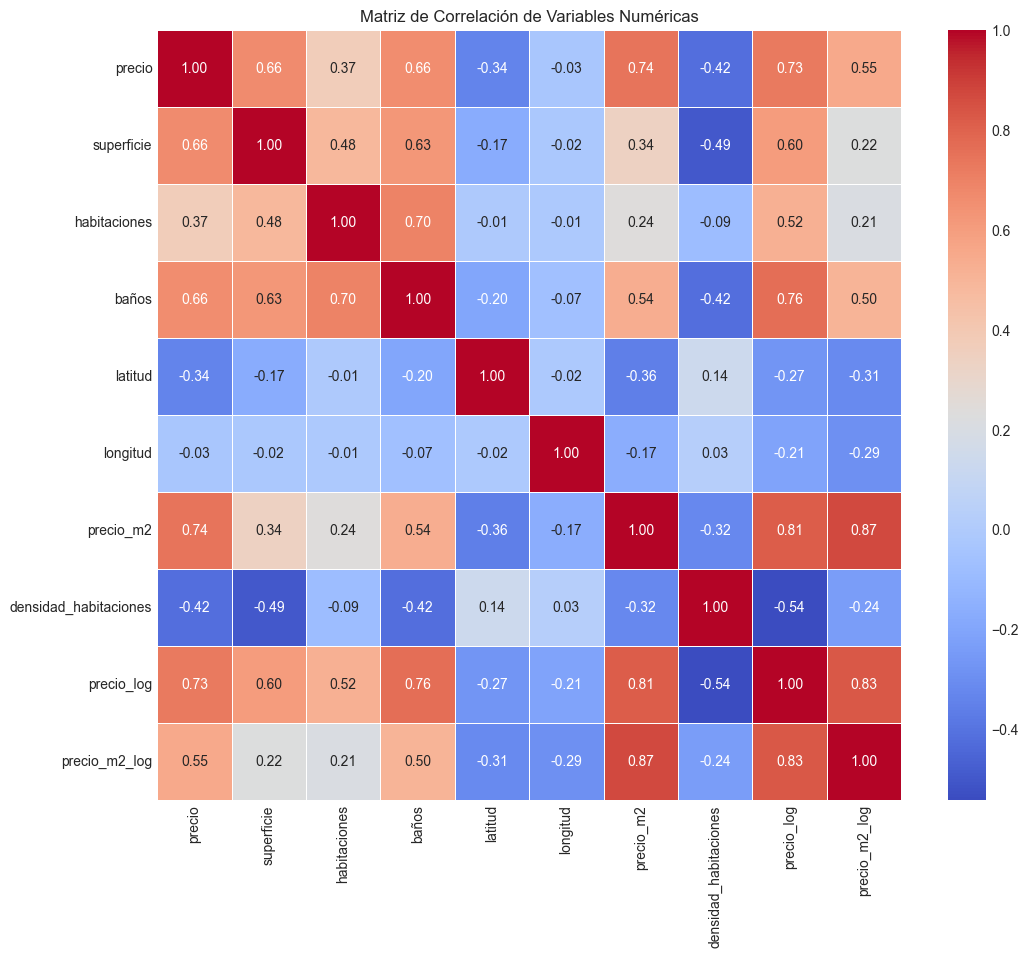


Correlaciones más altas con 'precio':
precio                   1.00
precio_m2                0.74
precio_log               0.73
superficie               0.66
baños                    0.66
precio_m2_log            0.55
habitaciones             0.37
longitud                -0.03
latitud                 -0.34
densidad_habitaciones   -0.42
Name: precio, dtype: float64

Generando Pairplot para: ['superficie', 'habitaciones', 'baños', 'precio_m2', 'precio_log']


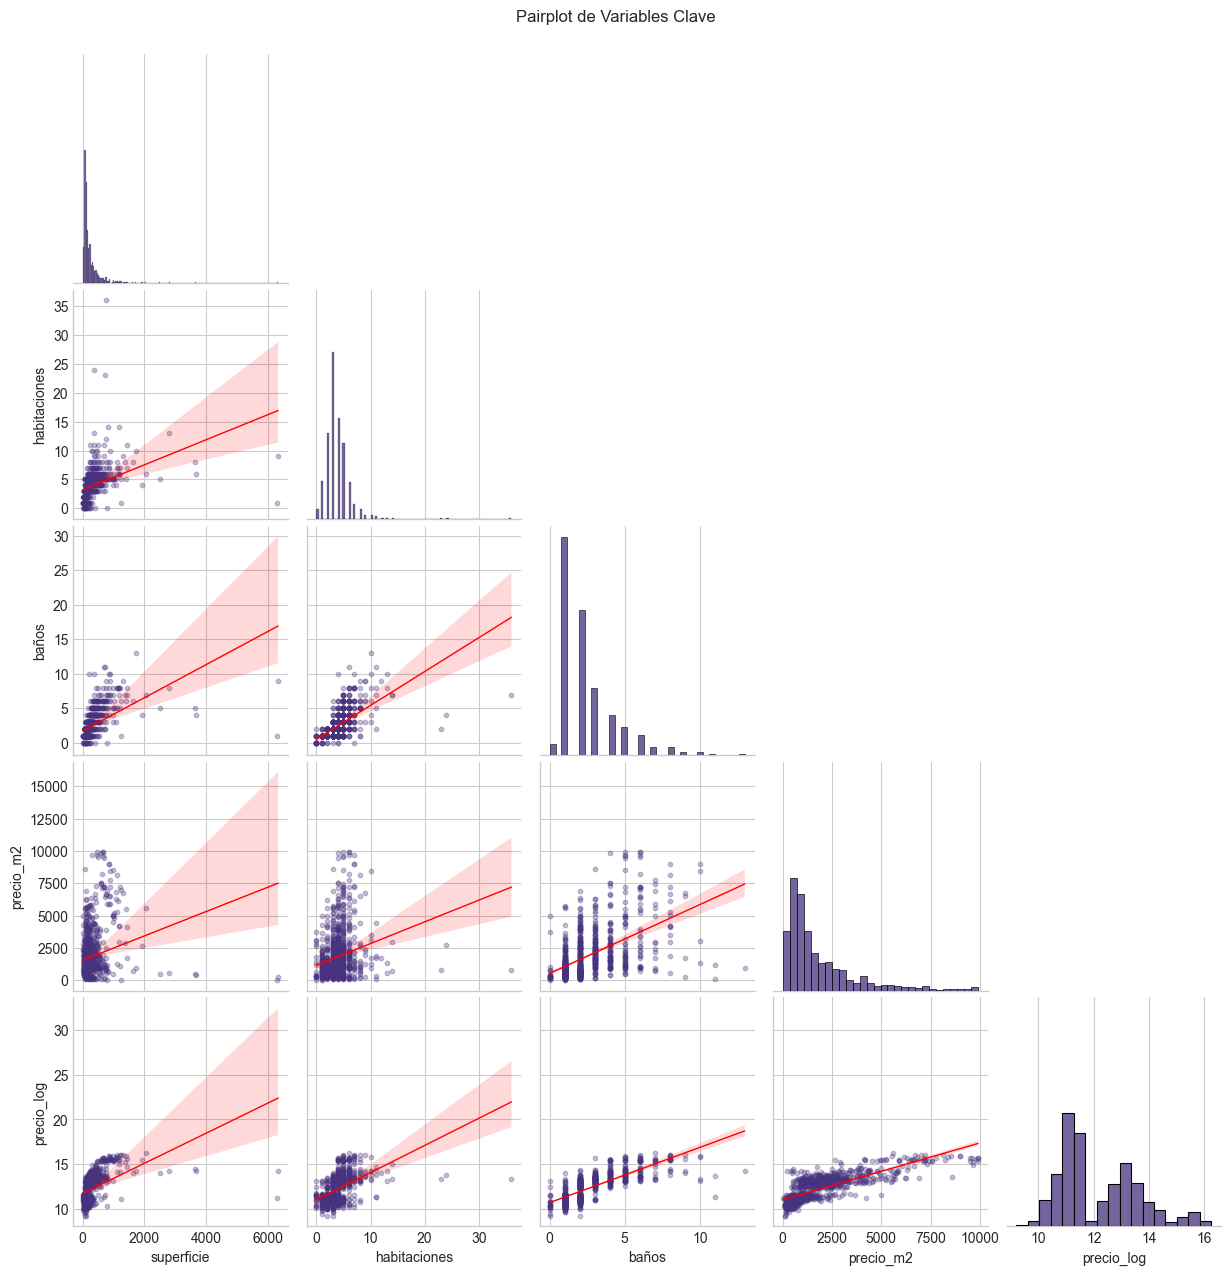

In [6]:
if not df.empty:
    print("\nAnálisis de Correlación Multivariada")
    print("======================================")
    
    # Seleccionar solo columnas numéricas para la matriz de correlación
    numerical_features_for_corr = df.select_dtypes(include=np.number).columns.tolist()
    
    # Usar df_analysis si contiene las transformaciones logarítmicas y queremos incluirlas
    # O df si queremos las originales. Para este ejemplo, usamos df y añadimos las log si existen en df_analysis
    df_corr = df.copy()
    if 'precio_log' in df_analysis.columns and 'precio_log' not in df_corr.columns:
        # Asegurar que los índices se alinean si df_analysis fue subconjunto
        df_corr = df_corr.join(df_analysis['precio_log'])
    if 'precio_m2_log' in df_analysis.columns and 'precio_m2_log' not in df_corr.columns:
        df_corr = df_corr.join(df_analysis['precio_m2_log'])
        
    # Filtrar solo las columnas numéricas que realmente existen en df_corr
    # y que no sean todo NaN después de un posible join.
    numerical_features_for_corr_final = [col for col in numerical_features_for_corr if col in df_corr.columns and df_corr[col].notna().any()]
    if 'precio_log' in df_corr.columns and df_corr['precio_log'].notna().any() and 'precio_log' not in numerical_features_for_corr_final:
        numerical_features_for_corr_final.append('precio_log')
    if 'precio_m2_log' in df_corr.columns and df_corr['precio_m2_log'].notna().any() and 'precio_m2_log' not in numerical_features_for_corr_final:
        numerical_features_for_corr_final.append('precio_m2_log')


    if numerical_features_for_corr_final:
        correlation_matrix = df_corr[numerical_features_for_corr_final].corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación de Variables Numéricas')
        plt.show()

        print("\nCorrelaciones más altas con 'precio':")
        if 'precio' in correlation_matrix:
            print(correlation_matrix['precio'].sort_values(ascending=False))
        elif 'precio_log' in correlation_matrix: # Si precio no está, pero precio_log sí
            print("\nCorrelaciones más altas con 'precio_log':")
            print(correlation_matrix['precio_log'].sort_values(ascending=False))

        # Pairplots para un subconjunto de variables clave
        pairplot_cols = ['precio', 'superficie', 'habitaciones', 'baños', 'precio_m2']
        if 'precio_log' in df_corr.columns and df_corr['precio_log'].notna().any():
             if 'precio' in pairplot_cols: pairplot_cols.remove('precio') # Evitar redundancia si se prefiere log
             pairplot_cols.append('precio_log')
        
        pairplot_cols_existing = [col for col in pairplot_cols if col in df_corr.columns and df_corr[col].notna().any()]
        
        if len(pairplot_cols_existing) > 1:
            print(f"\nGenerando Pairplot para: {pairplot_cols_existing}")
            # Tomar una muestra si el dataset es muy grande
            sample_df_corr = df_corr[pairplot_cols_existing].sample(n=min(1000, len(df_corr)), random_state=42) if len(df_corr) > 1000 else df_corr[pairplot_cols_existing]
            
            sns.pairplot(sample_df_corr.dropna(), kind='reg', plot_kws={'line_kws':{'color':'red', 'lw':1}, 'scatter_kws': {'alpha': 0.3, 's': 10}}, corner=True)
            plt.suptitle('Pairplot de Variables Clave', y=1.02)
            plt.show()
        else:
            print("No hay suficientes columnas válidas para generar el pairplot.")
            
    else:
        print("No se encontraron columnas numéricas válidas para el análisis de correlación.")
else:
    print("El DataFrame está vacío. No se puede realizar el análisis.")

**Discusión de Correlaciones y Pairplots:**

*   **Matriz de Correlación:** Muestra relaciones lineales. `precio` suele correlacionarse positivamente con `superficie`, `habitaciones`, `baños`.
*   **Pairplots:** Permiten visualizar relaciones bivariadas (lineales y no lineales) y distribuciones individuales.

## 4. Análisis Geoespacial General de Precios y Características

Crearemos gráficos de dispersión usando `latitud` y `longitud` para visualizar la distribución geográfica de las propiedades en Andalucía. Colorearemos los puntos por `precio` y `precio_m2`, y también podríamos usar el tamaño de los puntos para representar `superficie`.


Análisis Geoespacial General


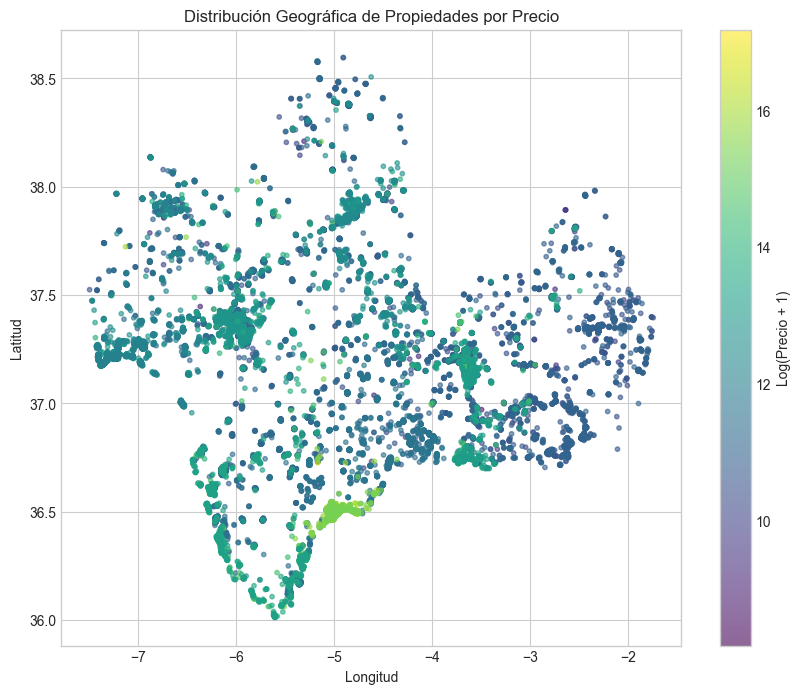

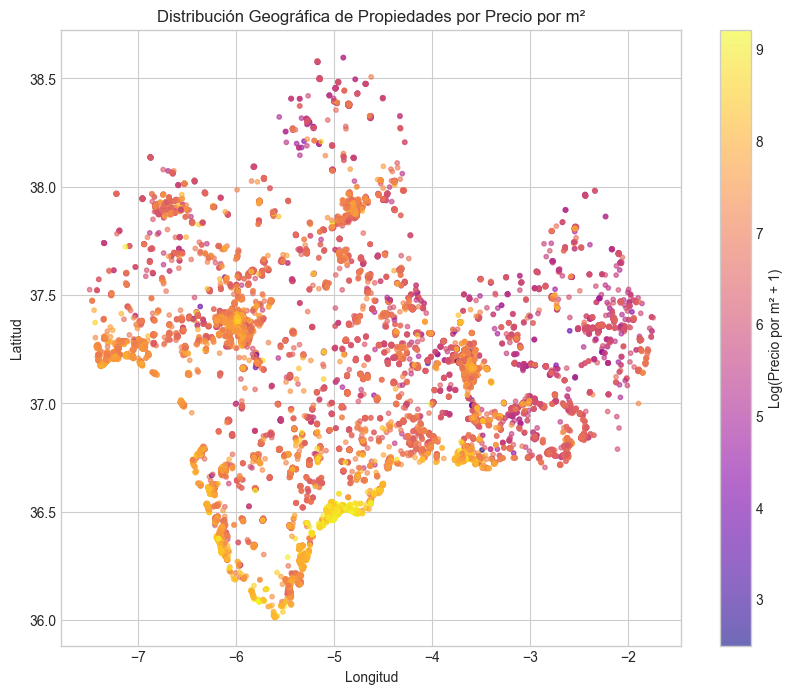

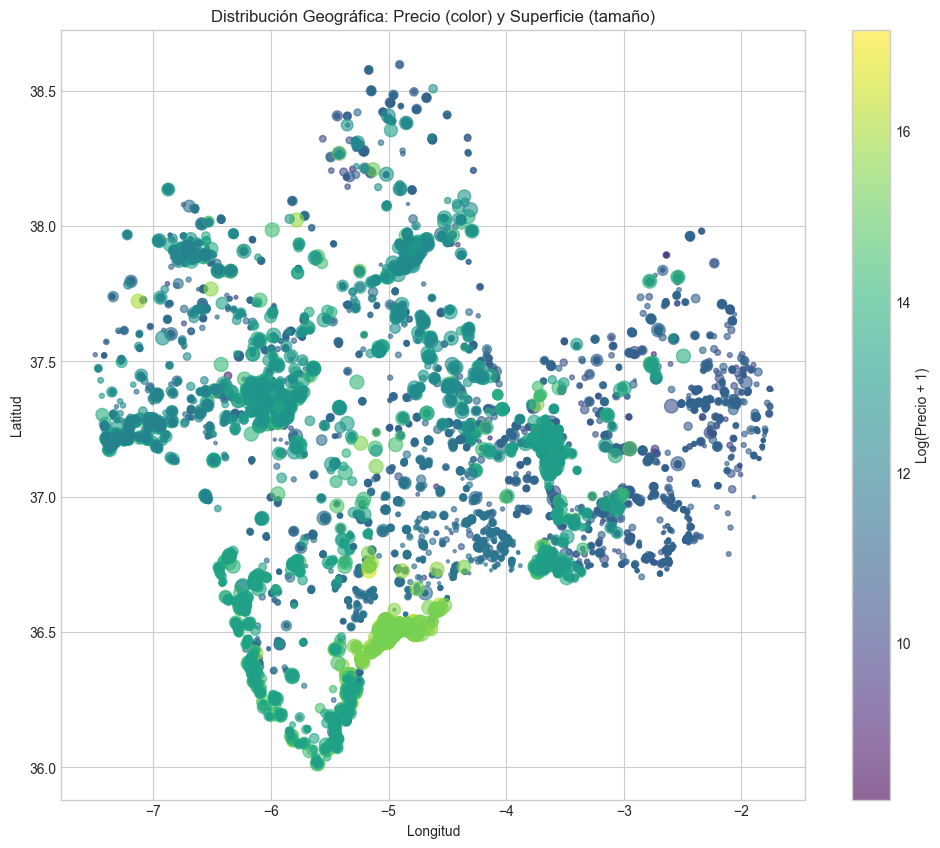

In [7]:
if not df.empty and 'latitud' in df.columns and 'longitud' in df.columns:
    print("\nAnálisis Geoespacial General")
    print("=============================")
    
    # Crear una copia para el análisis geoespacial, eliminando NaNs en coordenadas y variables de interés
    df_geo = df.dropna(subset=['latitud', 'longitud', 'precio', 'precio_m2', 'superficie']).copy()

    if not df_geo.empty:
        # Scatter plot: latitud vs longitud, coloreado por precio (log)
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(df_geo['longitud'], df_geo['latitud'], 
                              c=np.log1p(df_geo['precio']), # Usar log de precio para mejor visualización
                              cmap='viridis', alpha=0.6, s=10)
        plt.colorbar(scatter, label='Log(Precio + 1)')
        plt.title('Distribución Geográfica de Propiedades por Precio')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        # Scatter plot: latitud vs longitud, coloreado por precio_m2 (log)
        plt.figure(figsize=(10, 8))
        scatter_pm2 = plt.scatter(df_geo['longitud'], df_geo['latitud'], 
                                  c=np.log1p(df_geo['precio_m2']), # Usar log de precio_m2
                                  cmap='plasma', alpha=0.6, s=10)
        plt.colorbar(scatter_pm2, label='Log(Precio por m² + 1)')
        plt.title('Distribución Geográfica de Propiedades por Precio por m²')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        # Scatter plot: latitud vs longitud, coloreado por precio, tamaño por superficie
        max_superficie_display = df_geo['superficie'].quantile(0.95) 
        sizes = (df_geo['superficie'] / max_superficie_display) * 100 
        sizes = np.clip(sizes, 5, 100) 

        plt.figure(figsize=(12, 10))
        scatter_size = plt.scatter(df_geo['longitud'], df_geo['latitud'], 
                                   c=np.log1p(df_geo['precio']), 
                                   cmap='viridis', alpha=0.6, s=sizes)
        plt.colorbar(scatter_size, label='Log(Precio + 1)')
        plt.title('Distribución Geográfica: Precio (color) y Superficie (tamaño)')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
        
    else:
        print("No hay suficientes datos después de eliminar NaNs para el análisis geoespacial.")
        
else:
    print("El DataFrame está vacío o no contiene columnas de latitud/longitud.")

**Discusión del Análisis Geoespacial General:**

*   Estos gráficos ayudan a visualizar concentraciones de propiedades y variaciones de precios a nivel regional en Andalucía.
*   Se pueden identificar "puntos calientes" (zonas caras) y "puntos fríos" (zonas baratas) de forma general.

## 5. Ingeniería de la Característica 'Provincia' y Conteo de Propiedades

Crearemos una nueva columna `provincia` en el DataFrame. El objetivo es asignar cada propiedad a una de las 8 provincias andaluzas: Almería, Cádiz, Córdoba, Granada, Huelva, Jaén, Málaga o Sevilla.

La asignación se intentará a partir de la columna `ubicacion`. Este es un campo de texto libre, por lo que la extracción puede no ser perfecta y requeriría un procesamiento de lenguaje natural más avanzado o geocodificación para una precisión total. Para este ejercicio, utilizaremos un método simplificado basado en la búsqueda de nombres de ciudades clave o provincias en el texto de `ubicacion`.

Si la columna `provincia` ya existiera o fuera fácilmente derivable de otra columna estructurada, ese método sería preferible.


Ingeniería de la Característica 'Provincia'

Conteo de propiedades por provincia extraída (incluyendo 'Desconocida'):
provincia
Desconocida    23272
Huelva           162
Málaga           140
Córdoba          123
Granada          110
Cádiz            106
Sevilla           85
Almería           71
Jaén              34
Úbeda              4
Name: count, dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_17728\1567045737.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_provincias_identificadas.index, y=conteo_provincias_identificadas.values, palette='Set2')


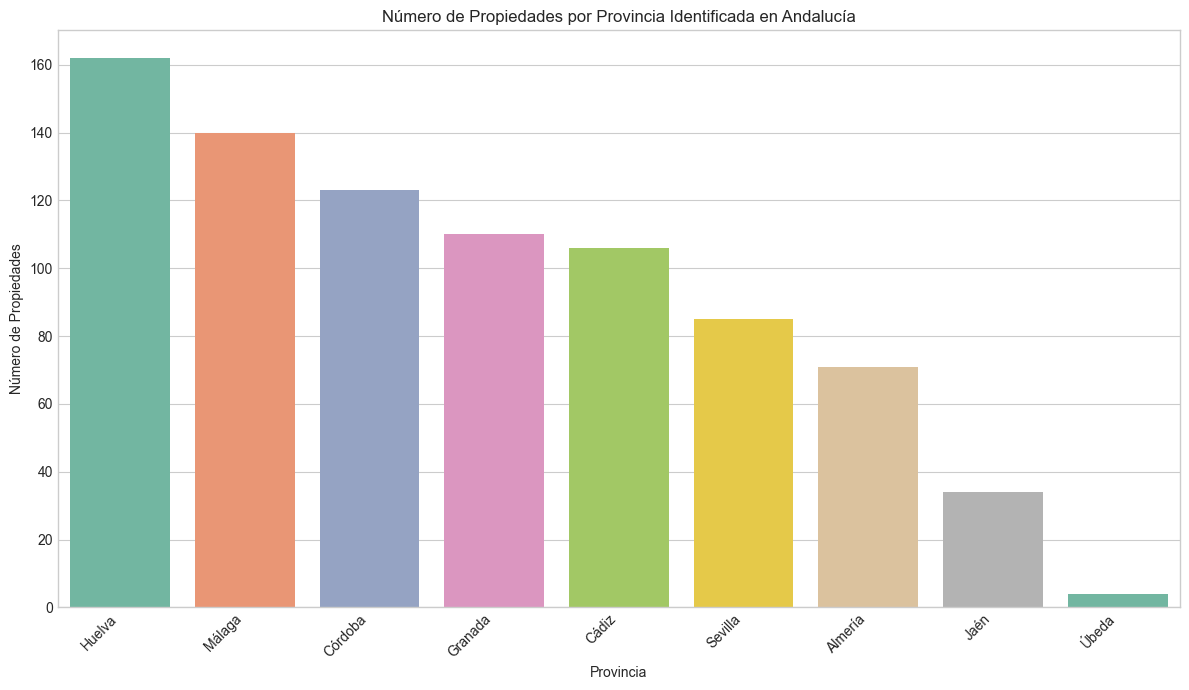


Advertencia: 23272 propiedades no pudieron ser asignadas a una provincia (etiquetadas como 'Desconocida').
Esto puede afectar la representatividad del análisis provincial.
Para mejorar esto, se necesitaría un mapeo más robusto, NLP, o geocodificación (lat/lon -> provincia).
Ejemplos de 'ubicacion' no mapeadas:


ubicacion
Barrio Brillante                                 185
Centro                                           147
Barrio Centro                                    138
Barrio Casco Histórico - Corredera - Ribera      110
Barrio Casco Histórico - Ollerías - Marrubial     85
Name: count, dtype: int64

In [8]:
if not df.empty:
    print("\nIngeniería de la Característica 'Provincia'")
    print("===========================================")

    # Definición de las provincias de Andalucía
    provincias_andalucia = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla']

    # Función simplificada para extraer provincia de la columna 'ubicacion'
    # Esta función es un ejemplo y puede necesitar mejoras significativas.
    def extraer_provincia(ubicacion_str):
        if not isinstance(ubicacion_str, str):
            return 'Desconocida'
        
        ubicacion_lower = ubicacion_str.lower()
        
        # Mapeo de ciudades/términos clave a provincias (ejemplos)
        # Este mapeo debería ser lo más exhaustivo posible.
        map_terminos_provincia = {
            'almería': 'Almería', 'almeria': 'Almería', 'roquetas de mar': 'Almería', 'el ejido': 'Almería',
            'cádiz': 'Cádiz', 'cadiz': 'Cádiz', 'jerez': 'Cádiz', 'algeciras': 'Cádiz', 'san fernando': 'Cádiz', 'el puerto de santa maría': 'Cádiz',
            'córdoba': 'Córdoba', 'cordoba': 'Córdoba', 'lucena': 'Córdoba',
            'granada': 'Granada', 'motril': 'Granada',
            'huelva': 'Huelva', 'lepe': 'Huelva',
            'jaén': 'Jaén', 'jaen': 'Jaén', 'linares': 'Jaén', 'úbeda': 'Úbeda',
            'málaga': 'Málaga', 'malaga': 'Málaga', 'marbella': 'Málaga', 'fuengirola': 'Málaga', 'torremolinos': 'Málaga', 'estepona': 'Málaga', 'benalmádena': 'Málaga',
            'sevilla': 'Sevilla', 'dos hermanas': 'Sevilla', 'alcalá de guadaíra': 'Sevilla', 'utrera': 'Sevilla'
        }
        
        # Búsqueda directa de nombres de provincia
        for prov in provincias_andalucia:
            if prov.lower() in ubicacion_lower:
                return prov
        
        # Búsqueda por términos clave
        for termino, provincia_map in map_terminos_provincia.items():
            if termino in ubicacion_lower:
                return provincia_map
        
        return 'Desconocida'

    if 'ubicacion' in df.columns:
        # Crear una copia del DataFrame para no modificar el original directamente en este paso
        df_prov = df.copy()
        df_prov['provincia'] = df_prov['ubicacion'].apply(extraer_provincia)
        
        # Verificar cuántas se asignaron y cuántas quedaron como 'Desconocida'
        print("\nConteo de propiedades por provincia extraída (incluyendo 'Desconocida'):")
        print(df_prov['provincia'].value_counts())

        # Filtrar las 'Desconocida' para el gráfico de barras de provincias identificadas
        conteo_provincias_identificadas = df_prov[df_prov['provincia'] != 'Desconocida']['provincia'].value_counts()

        if not conteo_provincias_identificadas.empty:
            plt.figure(figsize=(12, 7))
            sns.barplot(x=conteo_provincias_identificadas.index, y=conteo_provincias_identificadas.values, palette='Set2')
            plt.title('Número de Propiedades por Provincia Identificada en Andalucía')
            plt.xlabel('Provincia')
            plt.ylabel('Número de Propiedades')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            # Para análisis posteriores, podríamos decidir trabajar solo con las provincias identificadas
            # df = df_prov[df_prov['provincia'] != 'Desconocida'].copy()
            # O mantenerlas y gestionarlas. Por ahora, df_prov tiene la nueva columna.
            # Actualizamos el df principal para que las siguientes celdas usen la columna 'provincia'
            df['provincia'] = df_prov['provincia']

        else:
            print("No se pudieron identificar provincias a partir de la columna 'ubicacion' con el método actual.")
            if 'provincia' not in df.columns: # Asegurar que la columna existe aunque esté vacía o toda 'Desconocida'
                 df['provincia'] = 'Desconocida'


        # Discusión sobre la calidad de la extracción
        num_desconocidas = df_prov[df_prov['provincia'] == 'Desconocida'].shape[0]
        if num_desconocidas > 0:
            print(f"\nAdvertencia: {num_desconocidas} propiedades no pudieron ser asignadas a una provincia (etiquetadas como 'Desconocida').")
            print("Esto puede afectar la representatividad del análisis provincial.")
            print("Para mejorar esto, se necesitaría un mapeo más robusto, NLP, o geocodificación (lat/lon -> provincia).")
            print("Ejemplos de 'ubicacion' no mapeadas:")
            display(df_prov[df_prov['provincia'] == 'Desconocida']['ubicacion'].value_counts().head())

    else:
        print("La columna 'ubicacion' no existe, no se puede extraer la provincia.")
        df['provincia'] = 'No disponible' # Columna placeholder

    # Si 'latitud' y 'longitud' están disponibles, se podría usar geocodificación inversa como alternativa más robusta
    # Ejemplo conceptual (requiere librería como geopy y conexión a internet):
    # from geopy.geocoders import Nominatim
    # geolocator = Nominatim(user_agent="tfg_analisis_viviendas")
    # def get_provincia_from_coords(row):
    #     try:
    #         location = geolocator.reverse((row['latitud'], row['longitud']), exactly_one=True, language='es', timeout=10)
    #         address = location.raw.get('address', {})
    #         state = address.get('state', '') # 'state' suele ser la provincia en España para Nominatim
    #         # Aquí se necesitaría un mapeo de 'state' a las 8 provincias andaluzas si los nombres no coinciden exactamente
    #         if state in provincias_andalucia: return state
    #         # ... lógica adicional de mapeo ...
    #         return state if state else 'Desconocida (Geo)'
    #     except Exception as e:
    #         return 'Error Geo'
    # if 'latitud' in df.columns and 'longitud' in df.columns and False: # Deshabilitado por defecto
    #     print("\nIntentando geocodificación inversa para las 'Desconocida' (esto puede tardar)...")
    #     # df.loc[df['provincia'] == 'Desconocida', 'provincia_geo'] = df[df['provincia'] == 'Desconocida'].apply(get_provincia_from_coords, axis=1)
    #     # print(df['provincia_geo'].value_counts())

else:
    print("El DataFrame está vacío. No se puede realizar la ingeniería de 'provincia'.")

## 6. Análisis Descriptivo de Variables Clave por Provincia

Una vez asignada la provincia, calcularemos estadísticas descriptivas (media, mediana, desviación estándar, mínimo, máximo) para las variables numéricas clave (`precio`, `superficie`, `habitaciones`, `baños`, `precio_m2`), agrupadas por la columna `provincia`. Esto nos dará una primera visión de cómo estas características varían regionalmente.

In [9]:
if not df.empty and 'provincia' in df.columns and df[df['provincia'] != 'Desconocida']['provincia'].nunique() > 0:
    print("\nAnálisis Descriptivo de Variables Clave por Provincia")
    print("=====================================================")
    
    # Filtrar datos donde la provincia ha sido identificada y no es 'Desconocida' o 'No disponible'
    df_analisis_prov = df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')].copy()
    
    if not df_analisis_prov.empty:
        variables_descriptivas = ['precio', 'superficie', 'habitaciones', 'baños', 'precio_m2']
        
        # Asegurarse de que las columnas existen
        variables_existentes = [var for var in variables_descriptivas if var in df_analisis_prov.columns]
        
        if variables_existentes:
            print(f"Analizando para las variables: {variables_existentes}\n")
            
            stats_por_provincia = df_analisis_prov.groupby('provincia')[variables_existentes].agg(
                ['mean', 'median', 'std', 'min', 'max', 'count']
            )
            
            # Mejorar la presentación de las estadísticas
            for var in variables_existentes:
                print(f"--- Estadísticas para '{var}' por Provincia ---")
                display(stats_por_provincia[var].sort_values(by='median', ascending=False))
                print("\\n")
        else:
            print("Ninguna de las variables clave para análisis descriptivo se encuentra en el DataFrame.")
            
    else:
        print("No hay datos suficientes con provincias identificadas para realizar el análisis descriptivo.")
else:
    print("El DataFrame está vacío, la columna 'provincia' no existe, o no hay provincias identificadas (excluyendo 'Desconocida').")


Análisis Descriptivo de Variables Clave por Provincia
Analizando para las variables: ['precio', 'superficie', 'habitaciones', 'baños', 'precio_m2']

--- Estadísticas para 'precio' por Provincia ---


,mean,median,std,min,max,count
provincia,,,,,,
Málaga,3686136.69,4500000.00,3375413.04,26000.00,12900000.00,140
Huelva,304540.57,109500.00,414833.53,27000.00,1650000.00,162
Cádiz,327837.83,92500.00,541775.52,20000.00,4999000.00,106
Sevilla,250580.59,85000.00,327565.80,10500.00,1500000.00,85
Córdoba,147175.12,70000.00,165052.96,20000.00,920000.00,123
Granada,442015.45,69450.00,1245788.28,20000.00,8800000.00,110
Jaén,91208.82,65000.00,100159.03,18600.00,590000.00,34
Úbeda,58150.00,62800.00,18675.03,32000.00,75000.00,4
Almería,101304.23,58000.00,202058.71,23000.00,1565000.00,71


\n
--- Estadísticas para 'superficie' por Provincia ---


,mean,median,std,min,max,count
provincia,,,,,,
Málaga,561.65,647.00,431.80,40.00,2004.00,140
Sevilla,245.86,118.00,286.77,25.00,1687.00,85
Huelva,269.95,116.00,422.45,41.00,1742.00,162
Cádiz,234.05,114.50,437.58,31.00,3300.00,106
Granada,218.82,112.00,287.97,37.00,2142.00,110
Córdoba,202.50,110.00,330.16,44.00,3400.00,123
Almería,115.04,88.00,76.03,50.00,482.00,71
Jaén,137.03,85.00,171.91,48.00,848.00,34
Úbeda,57.50,55.50,5.92,53.00,66.00,4


\n
--- Estadísticas para 'habitaciones' por Provincia ---


,mean,median,std,min,max,count
provincia,,,,,,
Málaga,4.53,5.00,1.84,0,10,140
Almería,3.04,3.00,1.31,0,9,71
Cádiz,3.28,3.00,1.91,1,17,106
Granada,3.74,3.00,2.19,1,16,110
Córdoba,3.54,3.00,1.85,1,18,123
Huelva,3.85,3.00,2.14,1,10,162
Jaén,3.24,3.00,1.76,1,10,34
Sevilla,3.21,3.00,1.71,0,9,85
Úbeda,2.75,3.00,0.50,2,3,4


\n
--- Estadísticas para 'baños' por Provincia ---


,mean,median,std,min,max,count
provincia,,,,,,
Málaga,4.26,5.00,2.69,0,12,140
Huelva,2.66,2.00,3.07,0,13,162
Cádiz,1.94,2.00,1.54,0,14,106
Córdoba,1.89,2.00,1.35,0,11,123
Almería,1.49,1.00,0.84,0,6,71
Granada,1.96,1.00,2.00,0,17,110
Jaén,1.35,1.00,0.65,0,3,34
Sevilla,1.88,1.00,1.35,0,6,85
Úbeda,1.00,1.00,0.00,1,1,4


\n
--- Estadísticas para 'precio_m2' por Provincia ---


,mean,median,std,min,max,count
provincia,,,,,,
Málaga,4720.69,5217.17,3687.65,114.31,9891.81,140
Cádiz,1786.60,1139.42,1598.74,28.79,7640.45,106
Úbeda,1000.19,1110.77,266.85,603.77,1175.44,4
Huelva,1260.50,1031.85,743.43,269.72,5612.24,162
Sevilla,1045.74,732.14,1109.50,160.22,7325.58,85
Granada,1139.96,722.22,1519.24,40.28,9839.36,110
Córdoba,798.51,685.19,491.92,21.47,3689.32,123
Jaén,766.04,658.52,349.52,290.62,1557.14,34
Almería,763.31,623.46,579.64,182.03,3548.75,71


\n


## 7. Análisis Comparativo de Precios (`precio` y `precio_m2`) por Provincia

Generaremos boxplots y/o violin plots para comparar visualmente las distribuciones de `precio` y `precio_m2` entre las 8 provincias andaluzas. También crearemos diagramas de barras para visualizar el precio mediano y el precio_m2 mediano por provincia, lo que facilitará la identificación de las provincias más caras y más baratas en términos medianos.


Análisis Comparativo de Precios por Provincia


C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3969117682.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analisis_prov, x='precio', y='provincia', order=order_provincias_precio, palette='coolwarm')


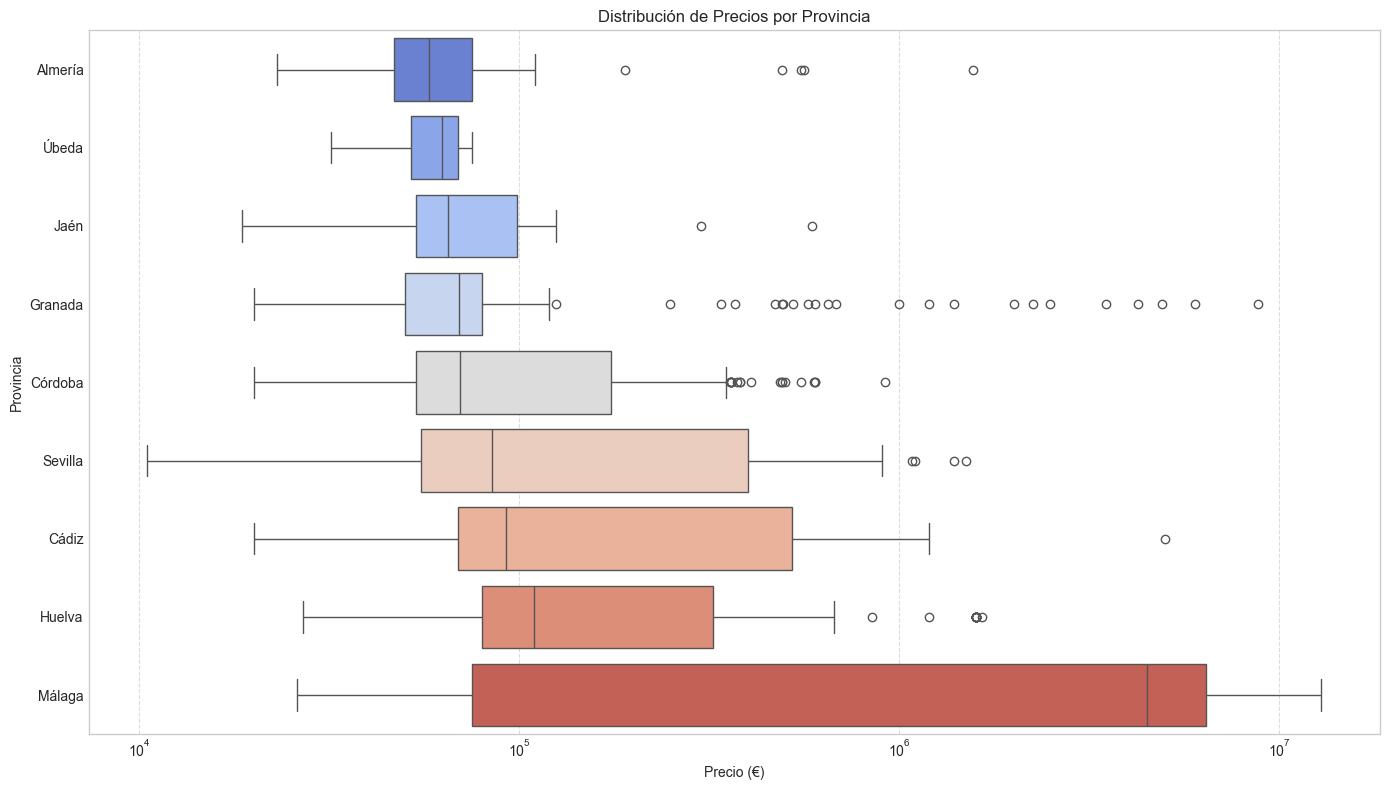

C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3969117682.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_precio_prov.index, y=median_precio_prov.values, palette='coolwarm_r', order=median_precio_prov.index)


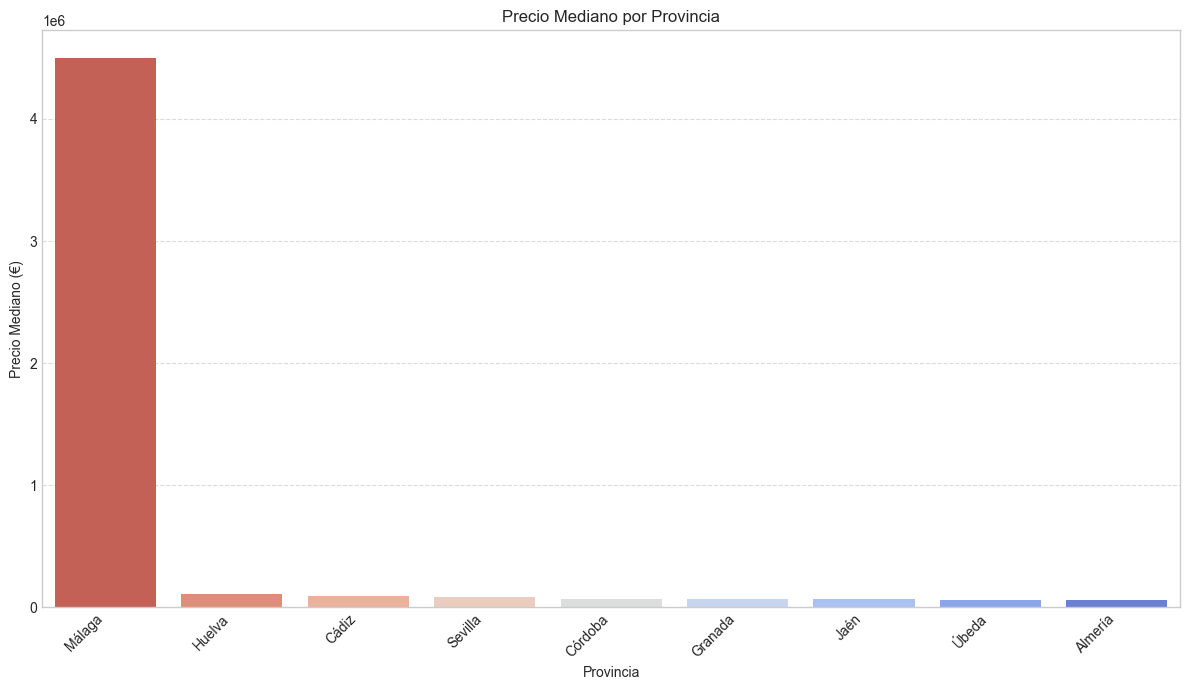

C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3969117682.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analisis_prov, x='precio_m2', y='provincia', order=order_provincias_precio_m2, palette='viridis_r')


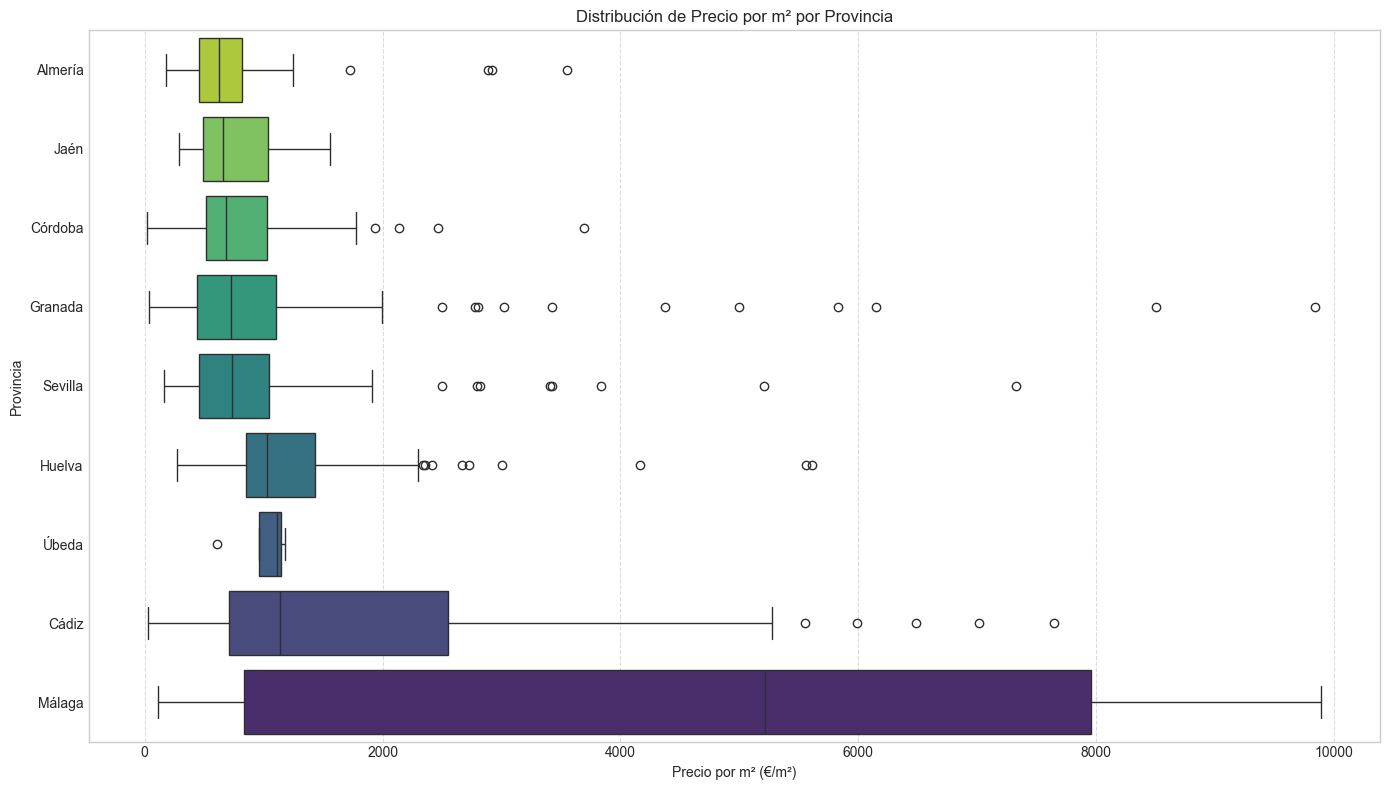

C:\Users\danie\AppData\Local\Temp\ipykernel_17728\3969117682.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_precio_m2_prov.index, y=median_precio_m2_prov.values, palette='viridis', order=median_precio_m2_prov.index)


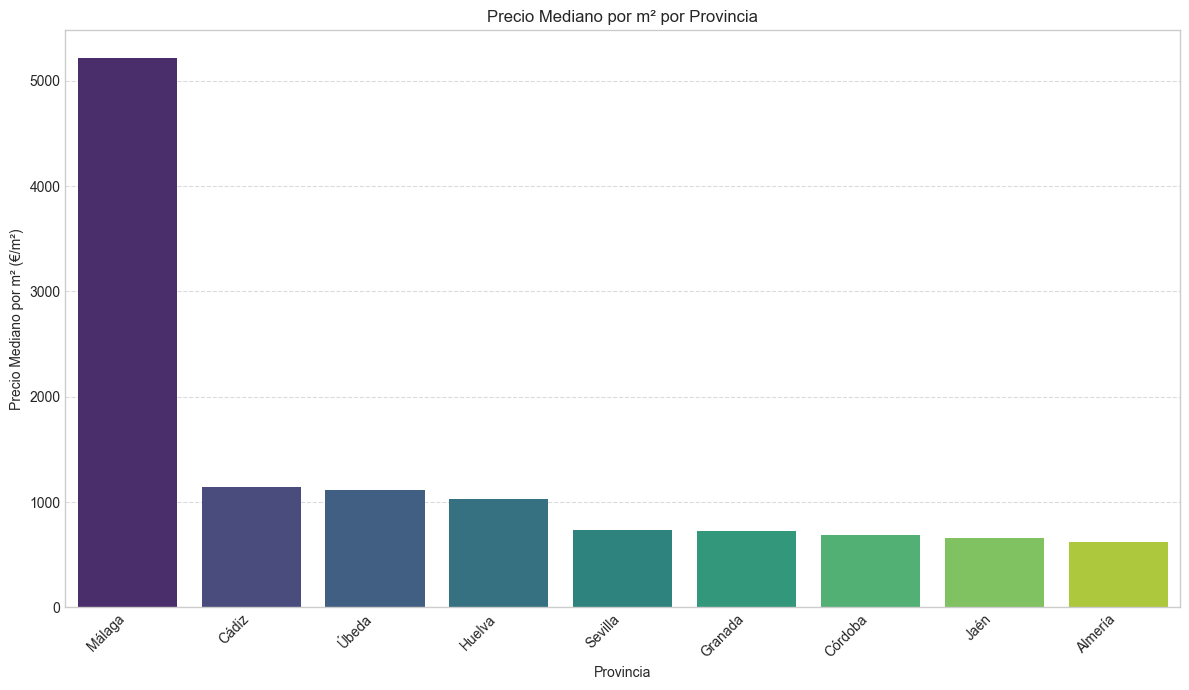

In [10]:
if not df.empty and 'provincia' in df.columns and df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')]['provincia'].nunique() > 0:
    print("\nAnálisis Comparativo de Precios por Provincia")
    print("=============================================")
    
    df_analisis_prov = df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')].copy()

    if not df_analisis_prov.empty and 'precio' in df_analisis_prov.columns:
        # Ordenar provincias por precio mediano para mejor visualización en boxplots
        order_provincias_precio = df_analisis_prov.groupby('provincia')['precio'].median().sort_values().index

        # Boxplot de 'precio' por provincia
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=df_analisis_prov, x='precio', y='provincia', order=order_provincias_precio, palette='coolwarm')
        plt.title('Distribución de Precios por Provincia')
        plt.xlabel('Precio (€)')
        plt.ylabel('Provincia')
        plt.xscale('log') # Precio suele tener una distribución asimétrica
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Diagrama de barras del precio mediano por provincia
        median_precio_prov = df_analisis_prov.groupby('provincia')['precio'].median().sort_values(ascending=False)
        plt.figure(figsize=(12, 7))
        sns.barplot(x=median_precio_prov.index, y=median_precio_prov.values, palette='coolwarm_r', order=median_precio_prov.index)
        plt.title('Precio Mediano por Provincia')
        plt.xlabel('Provincia')
        plt.ylabel('Precio Mediano (€)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    else:
        print("No hay datos de 'precio' o provincias identificadas para el análisis.")

    if not df_analisis_prov.empty and 'precio_m2' in df_analisis_prov.columns:
        # Ordenar provincias por precio_m2 mediano
        order_provincias_precio_m2 = df_analisis_prov.groupby('provincia')['precio_m2'].median().sort_values().index
        
        # Boxplot de 'precio_m2' por provincia
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=df_analisis_prov, x='precio_m2', y='provincia', order=order_provincias_precio_m2, palette='viridis_r')
        plt.title('Distribución de Precio por m² por Provincia')
        plt.xlabel('Precio por m² (€/m²)')
        plt.ylabel('Provincia')
        # plt.xscale('log') # Opcional, si precio_m2 también es muy asimétrico
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Diagrama de barras del precio_m2 mediano por provincia
        median_precio_m2_prov = df_analisis_prov.groupby('provincia')['precio_m2'].median().sort_values(ascending=False)
        plt.figure(figsize=(12, 7))
        sns.barplot(x=median_precio_m2_prov.index, y=median_precio_m2_prov.values, palette='viridis', order=median_precio_m2_prov.index)
        plt.title('Precio Mediano por m² por Provincia')
        plt.xlabel('Provincia')
        plt.ylabel('Precio Mediano por m² (€/m²)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
    else:
        print("No hay datos de 'precio_m2' o provincias identificadas para el análisis.")
else:
    print("El DataFrame está vacío, la columna 'provincia' no existe, o no hay provincias identificadas (excluyendo 'Desconocida').")

## 8. Distribución de Tipos de Propiedad por Provincia y su Relación con el Precio

En esta sección, visualizaremos cómo se distribuyen los diferentes `tipo_propiedad` dentro de cada una de las 8 provincias. Utilizaremos gráficos de barras agrupados o apilados para mostrar estas distribuciones. Posteriormente, analizaremos cómo varía el precio mediano (o `precio_m2` mediano) para los tipos de propiedad más comunes entre las diferentes provincias, lo que puede revelar preferencias o especializaciones del mercado inmobiliario en cada región.


Distribución de Tipos de Propiedad por Provincia y su Relación con el Precio


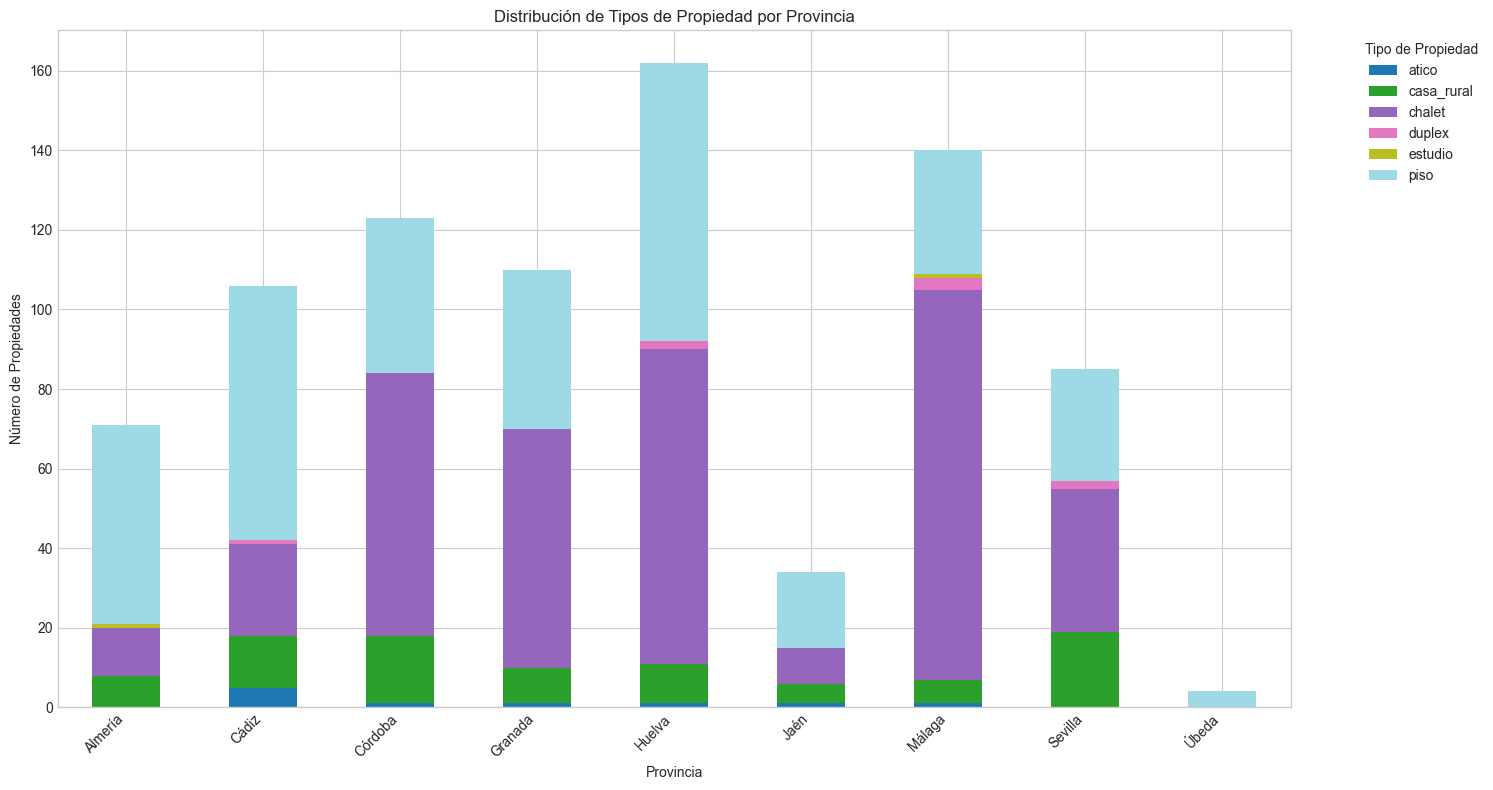

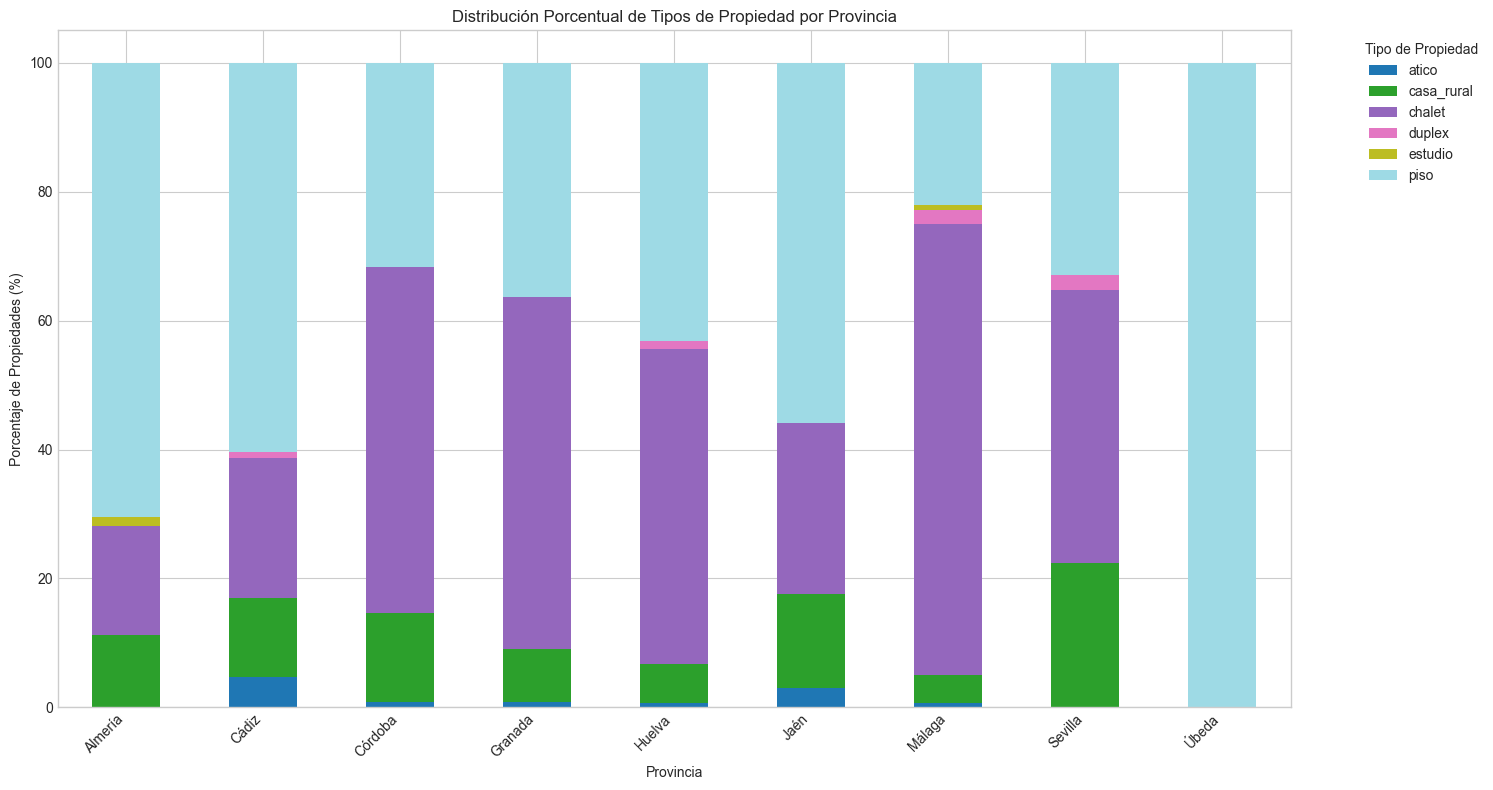

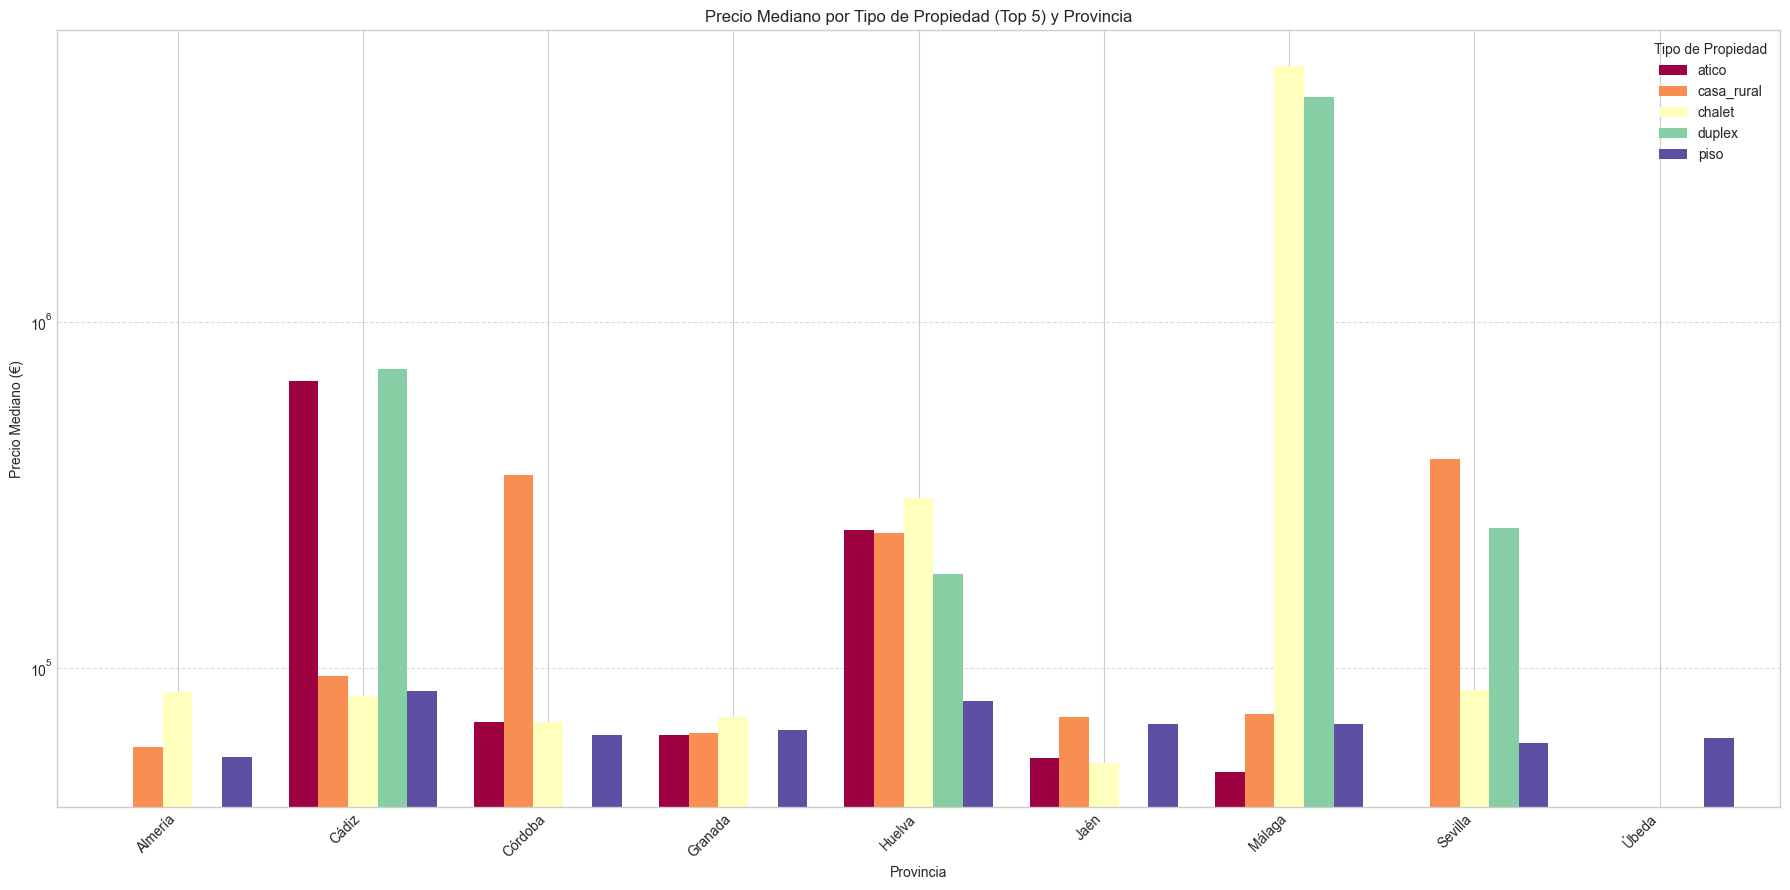

In [11]:
if not df.empty and 'provincia' in df.columns and 'tipo_propiedad' in df.columns and df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')]['provincia'].nunique() > 0:
    print("\nDistribución de Tipos de Propiedad por Provincia y su Relación con el Precio")
    print("============================================================================")
    
    df_analisis_prov = df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')].copy()

    if not df_analisis_prov.empty:
        # Distribución de tipo_propiedad por provincia (conteos)
        conteo_tipo_prov = df_analisis_prov.groupby(['provincia', 'tipo_propiedad']).size().unstack(fill_value=0)
        
        # Gráfico de barras apiladas (o agrupadas)
        conteo_tipo_prov.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
        plt.title('Distribución de Tipos de Propiedad por Provincia')
        plt.xlabel('Provincia')
        plt.ylabel('Número de Propiedades')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Distribución de tipo_propiedad por provincia (porcentajes)
        conteo_tipo_prov_pct = conteo_tipo_prov.apply(lambda x: x / x.sum() * 100, axis=1)
        conteo_tipo_prov_pct.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
        plt.title('Distribución Porcentual de Tipos de Propiedad por Provincia')
        plt.xlabel('Provincia')
        plt.ylabel('Porcentaje de Propiedades (%)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # Análisis del precio mediano por tipo de propiedad y provincia
        if 'precio' in df_analisis_prov.columns:
            # Considerar solo los tipos de propiedad más comunes para simplificar la visualización
            top_n_tipos = df_analisis_prov['tipo_propiedad'].value_counts().nlargest(5).index
            df_top_tipos = df_analisis_prov[df_analisis_prov['tipo_propiedad'].isin(top_n_tipos)]

            median_precio_tipo_prov = df_top_tipos.groupby(['provincia', 'tipo_propiedad'])['precio'].median().unstack()
            
            if not median_precio_tipo_prov.empty:
                median_precio_tipo_prov.plot(kind='bar', figsize=(18, 9), colormap='Spectral', width=0.8)
                plt.title(f'Precio Mediano por Tipo de Propiedad (Top {len(top_n_tipos)}) y Provincia')
                plt.xlabel('Provincia')
                plt.ylabel('Precio Mediano (€)')
                plt.xticks(rotation=45, ha='right')
                plt.legend(title='Tipo de Propiedad')
                plt.yscale('log') # Precios suelen ser asimétricos
                plt.grid(True, axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
            else:
                print("No se pudo calcular el precio mediano por tipo de propiedad y provincia (quizás por falta de datos combinados).")
        else:
            print("Columna 'precio' no disponible para análisis de precios por tipo y provincia.")
    else:
        print("No hay datos suficientes con provincias y tipos de propiedad identificados.")
else:
    print("El DataFrame está vacío o faltan las columnas 'provincia' o 'tipo_propiedad', o no hay provincias identificadas.")

## 9. Visualización de Densidad de Propiedades y Precios Medios con Enfoque Provincial

Utilizaremos mapas de densidad (KDE plots) o hexbin plots para visualizar la concentración de propiedades y el precio medio en el mapa de Andalucía. Adicionalmente, colorearemos los puntos en un mapa de dispersión (basado en `latitud` y `longitud`) según la `provincia` asignada, para observar la distribución geográfica de las propiedades por provincia y si la asignación de provincias parece coherente geográficamente.


Visualización de Densidad y Precios Medios con Enfoque Provincial


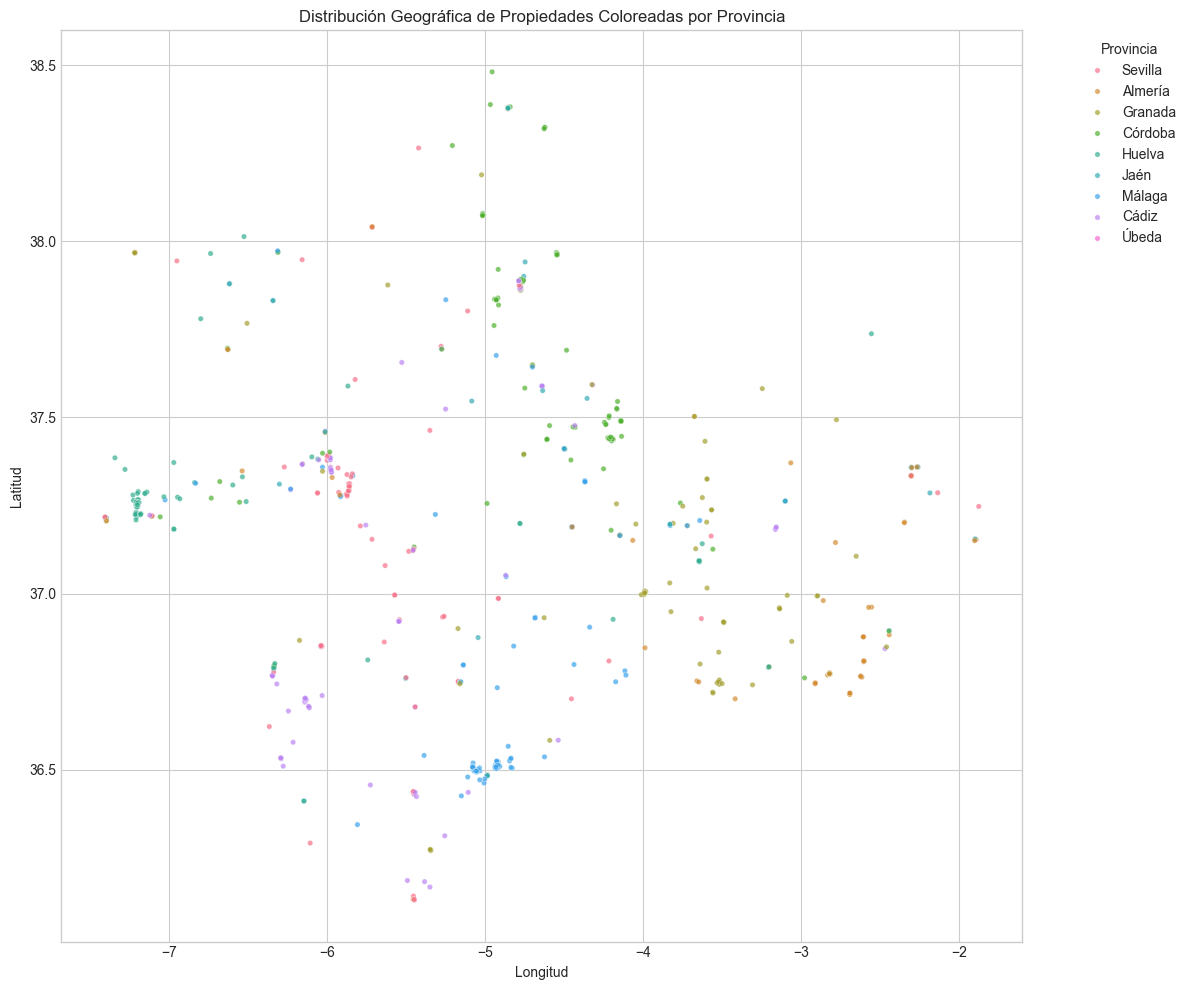

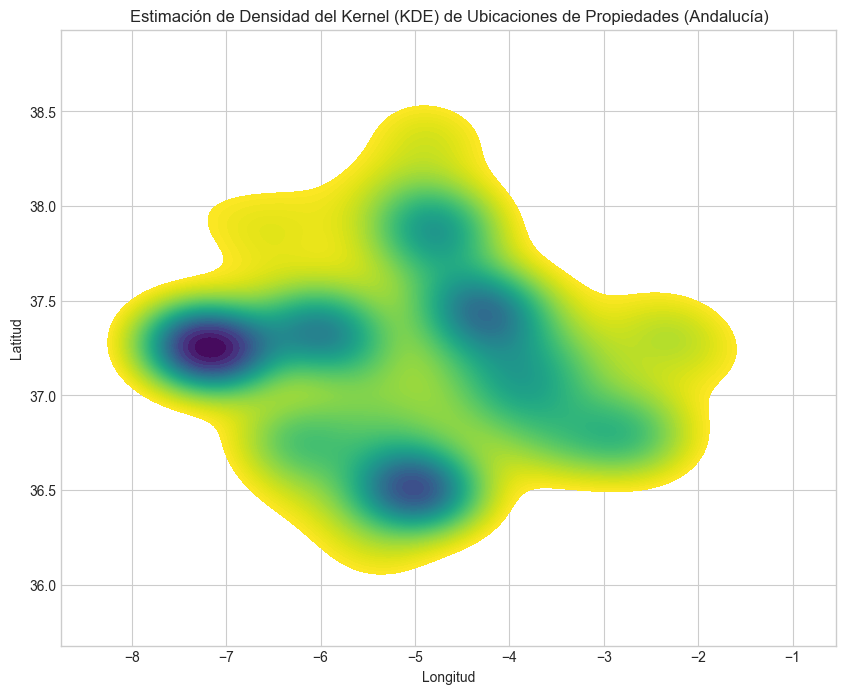

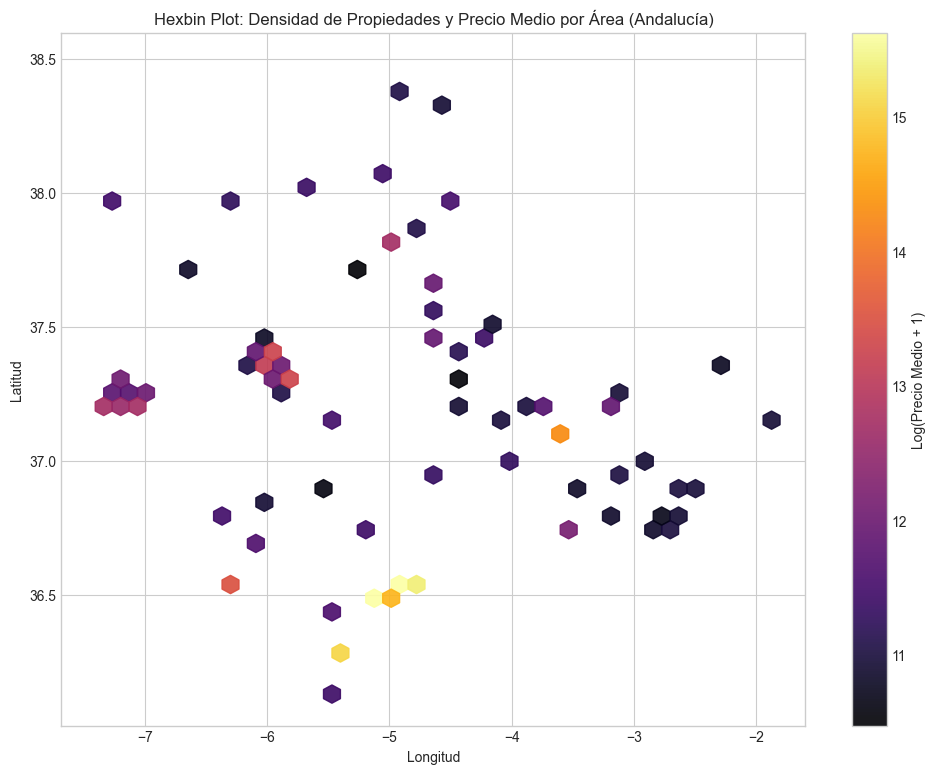

In [12]:
if not df.empty and 'provincia' in df.columns and 'latitud' in df.columns and 'longitud' in df.columns and df[(df['provincia'] != 'Desconocida') & (df['provincia'] != 'No disponible')]['provincia'].nunique() > 0:
    print("\nVisualización de Densidad y Precios Medios con Enfoque Provincial")
    print("===================================================================")
    
    df_analisis_geo_prov = df.dropna(subset=['latitud', 'longitud', 'precio', 'provincia'])
    df_analisis_geo_prov = df_analisis_geo_prov[(df_analisis_geo_prov['provincia'] != 'Desconocida') & (df_analisis_geo_prov['provincia'] != 'No disponible')].copy()

    if not df_analisis_geo_prov.empty:
        # Scatter plot coloreado por provincia
        plt.figure(figsize=(12, 10))
        # Usar un subconjunto de provincias si hay demasiadas para la leyenda o colores distintivos
        provincias_a_mostrar = df_analisis_geo_prov['provincia'].unique()
        palette_prov = sns.color_palette("husl", n_colors=len(provincias_a_mostrar)) # 'husl' o 'tab10'
        
        sns.scatterplot(data=df_analisis_geo_prov, x='longitud', y='latitud', hue='provincia', 
                        palette=palette_prov, s=15, alpha=0.7, legend='full')
        plt.title('Distribución Geográfica de Propiedades Coloreadas por Provincia')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # KDE plot para densidad de propiedades (general, ya que por provincia puede ser muy disperso)
        plt.figure(figsize=(10, 8))
        sns.kdeplot(data=df_analisis_geo_prov, x='longitud', y='latitud', cmap="viridis_r", fill=True, thresh=0.05, levels=100)
        plt.title('Estimación de Densidad del Kernel (KDE) de Ubicaciones de Propiedades (Andalucía)')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()

        # Hexbin plot para densidad y precio medio
        # (Puede ser difícil de interpretar si las provincias se superponen mucho geográficamente)
        plt.figure(figsize=(12, 9))
        # Usar log(precio) para C para mejor distribución de color
        hb = plt.hexbin(df_analisis_geo_prov['longitud'], df_analisis_geo_prov['latitud'], C=np.log1p(df_analisis_geo_prov['precio']), 
                        gridsize=40, cmap='inferno', reduce_C_function=np.mean, mincnt=3, alpha=0.9) # mincnt ajustado
        cb = plt.colorbar(hb, label='Log(Precio Medio + 1)')
        plt.title('Hexbin Plot: Densidad de Propiedades y Precio Medio por Área (Andalucía)')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.grid(True)
        plt.show()
        
        # Podríamos intentar facetar por provincia si el número de puntos por provincia es suficiente
        # Ejemplo conceptual:
        # g = sns.FacetGrid(df_analisis_geo_prov, col="provincia", col_wrap=4, height=4)
        # g.map(sns.kdeplot, "longitud", "latitud", cmap="Blues", fill=True, thresh=0.1)
        # g.set_titles("{col_name}")
        # plt.suptitle("KDE de Propiedades por Provincia", y=1.02)
        # plt.show()
        # Esto requiere suficientes datos por provincia y puede ser lento.

    else:
        print("No hay suficientes datos con provincia, latitud, longitud y precio identificados para el análisis geoespacial provincial.")
else:
    print("El DataFrame está vacío o faltan columnas clave ('provincia', 'latitud', 'longitud'), o no hay provincias identificadas.")

## Conclusión del Análisis Provincial

Este cuaderno ha extendido el análisis exploratorio de viviendas en Andalucía con un fuerte enfoque en las diferencias y similitudes entre sus 8 provincias.

**Principales Hallazgos y Observaciones del Análisis Provincial:**
1.  **Ingeniería de 'Provincia':** Se implementó un método para derivar la provincia desde la columna `ubicacion`. Se reconoció la limitación de este enfoque y la necesidad de métodos más robustos (como geocodificación) para una asignación precisa, especialmente para entradas de `ubicacion` ambiguas o incompletas.
2.  **Distribución de Propiedades:** Se visualizó el número de propiedades por provincia, revelando la concentración de la oferta inmobiliaria en el dataset.
3.  **Estadísticas Descriptivas Provinciales:** El análisis de medias, medianas y otras estadísticas para `precio`, `superficie`, `habitaciones`, `baños` y `precio_m2` por provincia mostró variaciones significativas, indicando mercados inmobiliarios heterogéneos a lo largo de Andalucía.
4.  **Comparativa de Precios:** Los boxplots y diagramas de barras de `precio` y `precio_m2` por provincia permitieron identificar claramente qué provincias tienden a tener niveles de precios más altos o más bajos. Por ejemplo, Málaga y Sevilla suelen destacar por precios más elevados, mientras que otras provincias pueden ofrecer opciones más económicas.
5.  **Tipos de Propiedad por Provincia:** Se observó que la mezcla de tipos de propiedad (pisos, casas, chalets, etc.) varía entre provincias. Además, el precio mediano para un mismo tipo de propiedad puede diferir considerablemente de una provincia a otra, reflejando la demanda local y las características del mercado.
6.  **Visualización Geoespacial Provincial:** El mapeo de propiedades coloreadas por provincia ayudó a confirmar la coherencia geográfica de la asignación de provincias y a visualizar las fronteras implícitas de la distribución de datos. Los mapas de densidad y hexbin plots ofrecieron una visión agregada de dónde se concentran las propiedades y cómo varían los precios medios regionalmente.

**Implicaciones para el TFG:**
*   La variable `provincia` es una característica potencialmente muy influyente para los modelos de predicción de precios.
*   Las diferencias observadas en precios y características entre provincias sugieren que podría ser beneficioso considerar interacciones entre `provincia` y otras variables, o incluso desarrollar modelos específicos por provincia si los datos lo permiten y si se observan comportamientos muy dispares.
*   La calidad de la asignación de `provincia` es crucial. Invertir tiempo en mejorar esta característica (e.g., mediante geocodificación precisa) podría mejorar significativamente la calidad del análisis y de los modelos predictivos.

Este análisis provincial proporciona una base sólida para entender la dinámica del mercado inmobiliario andaluz a un nivel más granular, lo cual es esencial para la construcción de modelos predictivos robustos y para la interpretación de sus resultados en el contexto del TFG.